<a href="https://colab.research.google.com/github/scharu07/Capstone-project---NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b><u>Import</u></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Alma Better/Capstone Projects/Unsupervised ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
dataset=pd.read_csv(path)

## <b><u>Data Inspection</u></b>

In [4]:
dataset.shape

(7787, 12)

In [5]:
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [6]:
dataset.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
dataset.describe(include='object')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   

              country       date_added rating  duration      listed_in  \
count            7280             7777   7780      7787           7787   
unique            681             1565     14       216            492   
top     United States  January 1, 2020  TV-MA  1 Season  Documentaries   
freq             2555              118   2863      1608            334   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3

In [9]:
dataset.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

## <b><u>Data Cleaning</u></b>

Creating a copy of original Dataset before manipulating

In [10]:
df=dataset.copy()

### Updating Appropriate Data type of Date added variable

In [11]:
df['date_added']=pd.to_datetime(df['date_added'],errors='ignore')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### <b>Handling Missing Data</b>

Method to evaluate the variables containing NaN values

In [13]:
def Find_Null_Values(df):
  '''This method will return columns with Np.NAN values &
  takes dataframe as an argument'''
  
  columns= df.columns.tolist()
  Nan_Columns=[]
  for i in columns:
    if(len(df[df[i].isna()])) >0:
      Nan_Columns.append(i)
  return Nan_Columns

In [14]:
list_NaNcols=Find_Null_Values(df)
print(list_NaNcols)

['director', 'cast', 'country', 'date_added', 'rating']


Calculating % of missing values

In [15]:
print('Percentage of Missing values :')
print(round(df[list_NaNcols].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Percentage of Missing values :
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64



From above describe query we can see there 4049 and 6831 unique values of Director and Cast respectively in this dataset of length 7787. 

Clustering based on Cast and Director wouldn't be a wise choice providing the large number of unique records. Hence, it is safe to drop these two columns




#### <b>Dropping Cast and Director column</b>

In [16]:
df.drop(columns=['cast','director'],axis=1,inplace=True)

In [17]:
df.head()

show_id     type  title        country date_added  release_year rating  \
0      s1  TV Show     3%         Brazil 2020-08-14          2020  TV-MA   
1      s2    Movie   7:19         Mexico 2016-12-23          2016  TV-MA   
2      s3    Movie  23:59      Singapore 2018-12-20          2011      R   
3      s4    Movie      9  United States 2017-11-16          2009  PG-13   
4      s5    Movie     21  United States 2020-01-01          2008  PG-13   

    duration                                          listed_in  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     93 min                       Dramas, International Movies   
2     78 min                Horror Movies, International Movies   
3     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4    123 min                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [18]:
Find_Null_Values(df)

['country', 'date_added', 'rating']

#### <b>Imputing Missing values of Country</b>

Country column has 6.51% missing values of entire dataset.

We need to visualize Country column before imputing

In [19]:
df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [20]:
len(df[df['country'].isna()])

507

NaN values in 507 records of Country can be imputed with Mode value

In [21]:
mode_country=stats.mode(df[~df.country.isna()].country)[0]
print('Mode of variable Country is: ',mode_country)

Mode of variable Country is:  ['United States']


In [22]:
df['country'].fillna(mode_country[0],inplace=True)

In [23]:
Find_Null_Values(df)

['date_added', 'rating']

#### <b>Imputing NaN values of date_added and rating columns</b>

Date_added and rating contains 0.13% and 0.09% of NaN values which sums to 0.22% of total dataset.

In [24]:
print(f"Total no of rows with NaN values in date_added Column is: {len(df[df['date_added'].isna()])}")
print(f"Total no of rows with NaN values in rating Column is: {len(df[df['rating'].isna()])}")

Total no of rows with NaN values in date_added Column is: 10
Total no of rows with NaN values in rating Column is: 7


17 rows can be dropped off with NaN values

In [25]:
df.dropna(axis=0,inplace=True)

#### Dataset Shape after NaN values treatment

In [26]:
Find_Null_Values(df)

[]

We have imputed all the NaN values from this dataset

In [27]:
df.shape

(7770, 10)

Column show_id can be dropped as it is a unique identifier of each record and the same purpose can be served with the index

In [28]:
df.drop(columns=['show_id'],axis=1,inplace=True)

## <b><u>Exploratory Data Analysis</u></b>


In [29]:
df.head()

type  title        country date_added  release_year rating   duration  \
0  TV Show     3%         Brazil 2020-08-14          2020  TV-MA  4 Seasons   
1    Movie   7:19         Mexico 2016-12-23          2016  TV-MA     93 min   
2    Movie  23:59      Singapore 2018-12-20          2011      R     78 min   
3    Movie      9  United States 2017-11-16          2009  PG-13     80 min   
4    Movie     21  United States 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### <b>Outlier Treatment</b>

#### Release Year Analysis Based on TV Shows

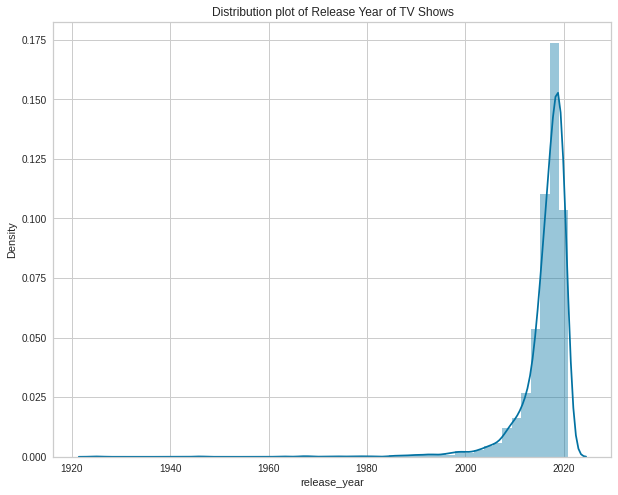

In [30]:
plt.figure(figsize = (10,8))
sns.distplot(df[df['type']=='TV Show'].release_year)
plt.title('Distribution plot of Release Year of TV Shows')
plt.show()

This plot is negatively skewed and it is quite evident from this distribution plot that TV shows started to release after 2000 

In [31]:
len(df[(df['type']=='TV Show') & (df['release_year']<2000)])

47

There are only 47 records with release year less than 2000. Considering the less count of the outliers we can drop off outliers from original dataset as well

In [32]:
index_to_drop=df[(df.release_year<2000) & (df['type']=='TV Show')].index.tolist()
df.drop(index=index_to_drop,inplace=True)

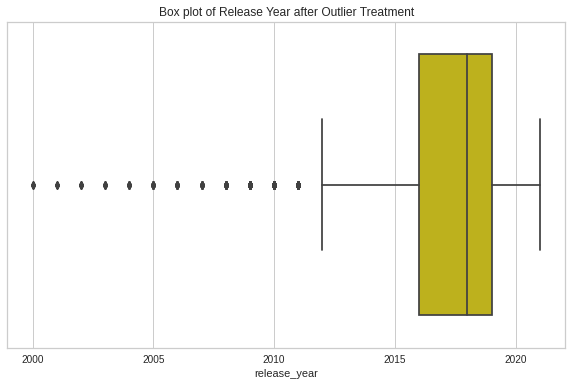

In [33]:
plt.figure(figsize = (10,6))
sns.boxplot(df[df['type']=='TV Show'].release_year,color='y')
plt.title('Box plot of Release Year after Outlier Treatment')
plt.show()

#### Release Year Analysis Based on Movies

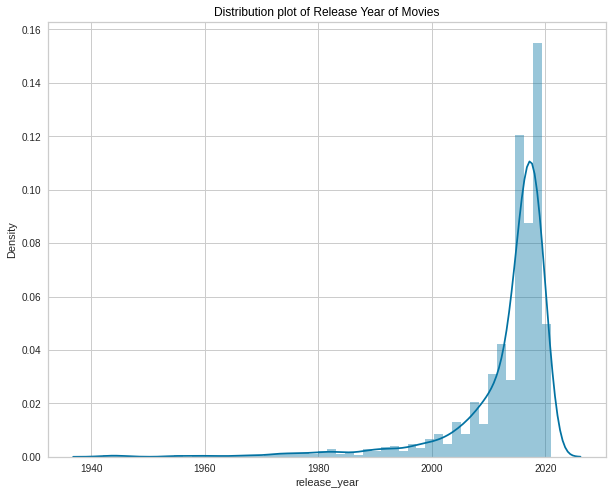

In [34]:
plt.figure(figsize = (10,8))
sns.distplot(df[df['type']=='Movie'].release_year)
plt.title('Distribution plot of Release Year of Movies',color='black')
plt.show()

This plot is also negatively skewed. There seems to be very less number of records of movies before 1970

In [35]:
len(df[(df['type']=='Movie') & (df['release_year']<1970)])

46

There are only 46 records with release year less than 1970. Considering the less count of the outliers we can drop off outliers from original dataset as well

In [36]:
index_to_drop=df[(df.release_year<1970) & (df['type']=='Movie')].index.tolist()
df.drop(index=index_to_drop,inplace=True)

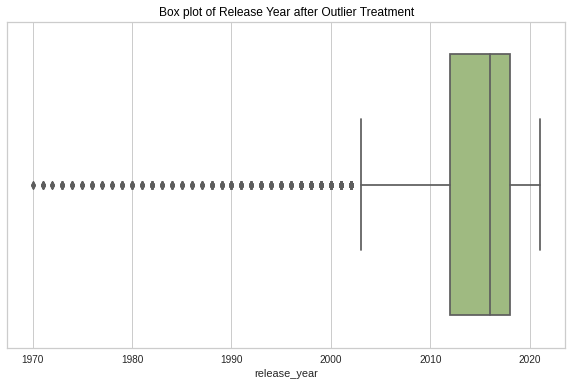

In [37]:
plt.figure(figsize = (10,6))
sns.boxplot(df[df['type']=='Movie'].release_year,color='g')
plt.title('Box plot of Release Year after Outlier Treatment',color='black')
plt.show()

### <b>Type Analysis</b>

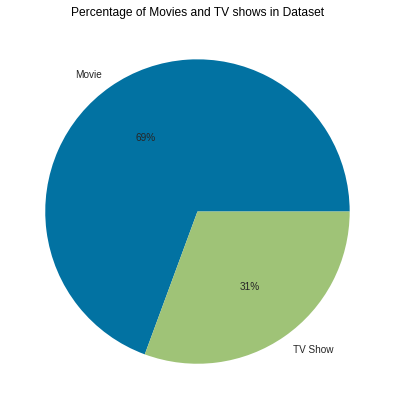

In [38]:
t=pd.DataFrame(df.type.value_counts().rename_axis('Type').reset_index(name='Count'))
plt.figure(figsize = (7,7))
plt.pie(t.Count,labels=t.Type,autopct='%.0f%%')
plt.title('Percentage of Movies and TV shows in Dataset',color='black')
plt.show()

### <b>Release year Analysis wrt Date Added on Netflix</b>

#### Movies

In [39]:
p=df[df['type']=='Movie']
p['release_added_diff']=p['date_added'].dt.year-p['release_year']
p.describe()

release_year  release_added_diff
count   5326.000000         5326.000000
mean    2013.401990            5.079234
std        8.137461            8.214730
min     1970.000000           -1.000000
25%     2012.000000            0.000000
50%     2016.000000            1.000000
75%     2018.000000            6.000000
max     2021.000000           50.000000

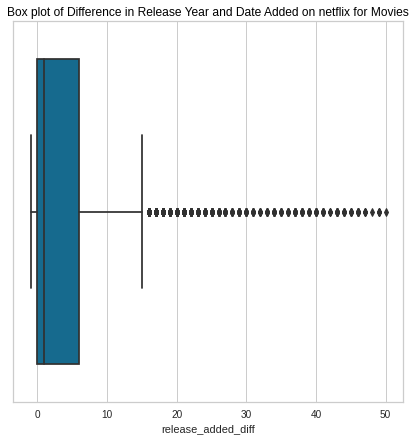

In [40]:
plt.figure(figsize = (7,7))
sns.boxplot(p.release_added_diff)
plt.title('Box plot of Difference in Release Year and Date Added on netflix for Movies',color='black')
plt.show()

In [41]:
p[p.release_added_diff==-1]

type                       title                country date_added  \
2602  Movie  Hans Teeuwen: Real Rancour            Netherlands 2017-07-01   
2981  Movie                    Incoming  Serbia, United States 2018-10-26   

      release_year rating duration                             listed_in  \
2602          2018  TV-MA   86 min                       Stand-Up Comedy   
2981          2019  TV-MA   89 min  Action & Adventure, Sci-Fi & Fantasy   

                                            description  release_added_diff  
2602  Comedian Hans Teeuwen rebels against political...                  -1  
2981  When an imprisoned terrorist cell hijacks a hi...                  -1

These two seems to be an error in record as Incoming and Hans Teeuwen movies are added on netflix even before they are released

#### TV Show

In [42]:
t=df[df['type']=='TV Show']
t['release_added_diff']=t['date_added'].dt.year-t['release_year']
t.describe()

release_year  release_added_diff
count   2351.000000         2351.000000
mean    2016.777967            1.773288
std        3.493100            3.056362
min     2000.000000           -3.000000
25%     2016.000000            0.000000
50%     2018.000000            0.000000
75%     2019.000000            2.000000
max     2021.000000           20.000000

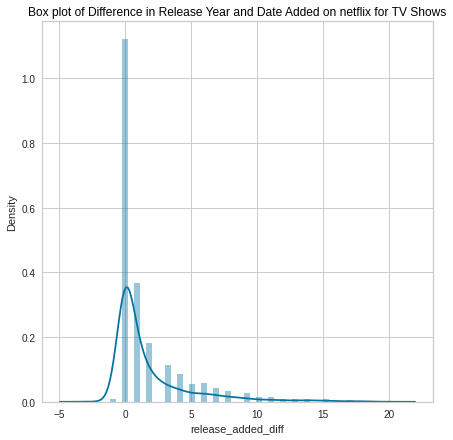

In [43]:
plt.figure(figsize = (7,7))
sns.distplot(t.release_added_diff)
plt.title('Box plot of Difference in Release Year and Date Added on netflix for TV Shows',color='black')
plt.show()

In [44]:
t[t.release_added_diff==20]

type   title        country date_added  release_year rating  \
4160  TV Show  Moesha  United States 2020-08-01          2000  TV-PG   

       duration                   listed_in  \
4160  6 Seasons  TV Comedies, Teen TV Shows   

                                            description  release_added_diff  
4160  Navigating the twists and firsts of high schoo...                  20

In [45]:
t[t.release_added_diff<0]

type                      title  \
583   TV Show       Arrested Development   
1025  TV Show            BoJack Horseman   
2311  TV Show               Fuller House   
2741  TV Show                      Hilda   
3098  TV Show                Jack Taylor   
3926  TV Show         Maradona in Mexico   
5493  TV Show                     Sense8   
6462  TV Show           The Hook Up Plan   
7132  TV Show                Tokyo Trial   
7318  TV Show  Unbreakable Kimmy Schmidt   

                                    country date_added  release_year rating  \
583                           United States 2018-05-29          2019  TV-MA   
1025                          United States 2019-10-25          2020  TV-MA   
2311                          United States 2019-12-06          2020  TV-PG   
2741  United Kingdom, Canada, United States 2020-12-14          2021  TV-Y7   
3098                 United States, Ireland 2013-03-31          2016  TV-MA   
3926       Argentina, United States, Mexico 2019-11-13          2020  TV-MA   
5493                          United States 2016-12-23          2018  TV-MA   
6462                                 France 2019-10-11          2020  TV-MA   
7132             Canada, Japan, Netherlands 2016-12-13          2017  TV-MA   
7318                          United States 2018-05-30          2019  TV-14   

       duration                                          listed_in  \
583   5 Seasons                                        TV Comedies   
1025  6 Seasons                                        TV Comedies   
2311  5 Seasons                                        TV Comedies   
2741  2 Seasons                                           Kids' TV   
3098   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
3926   1 Season              Docuseries, Spanish-Language TV Shows   
5493  2 Seasons            Crime TV Shows, TV Dramas, TV Mysteries   
6462  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
7132   1 Season                  International TV Shows, TV Dramas   
7318  4 Seasons                                        TV Comedies   

                                            description  release_added_diff  
583   It's the Emmy-winning story of a wealthy famil...                  -1  
1025  Meet the most beloved sitcom horse of the '90s...                  -1  
2311  The Tanner family’s adventures continue as DJ ...                  -1  
2741  Fearless, free-spirited Hilda finds new friend...                  -1  
3098  Ken Bruen's bestselling crime novels leap to l...                  -3  
3926  In this docuseries, soccer great Diego Maradon...                  -1  
5493  From the creators of "The Matrix" and "Babylon...                  -2  
6462  When Parisian Elsa gets hung up on her ex, her...                  -1  
7132  In the wake of World War II, 11 Allied judges ...                  -1  
7318  When a woman is rescued from a doomsday cult a...                  -1

1. There are 10 TV shows which are added on netflix even before they are released
2. Released_added_diff has maximum density at value 0 which implies that most of the TV shows are added on netflix in the same year as their release year.

### <b>Rating Analysis</b>

##### Ratings Analysis of TV Shows

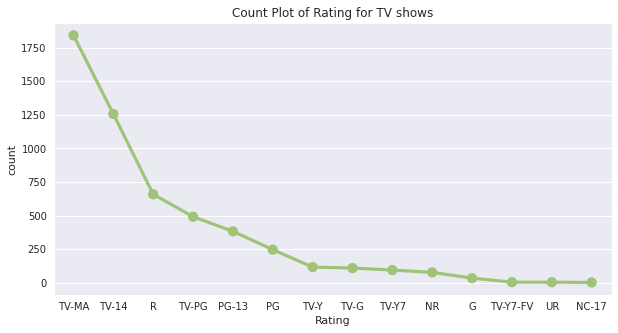

In [46]:
r=pd.DataFrame(p.rating.value_counts().rename_axis('Rating').reset_index(name='count'))
sns.set_style(style='darkgrid')
plt.figure(figsize = (10,5))
sns.pointplot(x='Rating',y='count',data=r,color='g')
plt.title('Count Plot of Rating for TV shows')
plt.show()

1. TV-MA has highest number of records in TV shows whicgh means these TV shows are to be viewed by adults and may be unsuitable for children under 17.
2. TV-14 is follwed by TV-MA in terms of members which means these programs contain material that most parents would find unsuitable for children under 14 years of age
3. Least numbers we have for TV-Y7-FV which means a program contains “fantasy violence” that may be more intense or combative than other TV-Y7 programs

##### Ratings Analysis of Movie

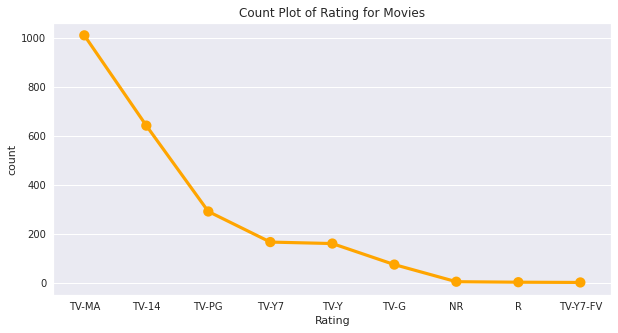

In [47]:
r=pd.DataFrame(t.rating.value_counts().rename_axis('Rating').reset_index(name='count'))
sns.set_style(style='darkgrid')
plt.figure(figsize = (10,5))
sns.pointplot(x='Rating',y='count',data=r,color='orange')
plt.title('Count Plot of Rating for Movies')
plt.show()

1. Most of the records have ratings TV-MA.
2. TV-MA is followed by TV-14 similar to TV shows

 ### <b>Analysis based on Duration</b>

#### TV Shows

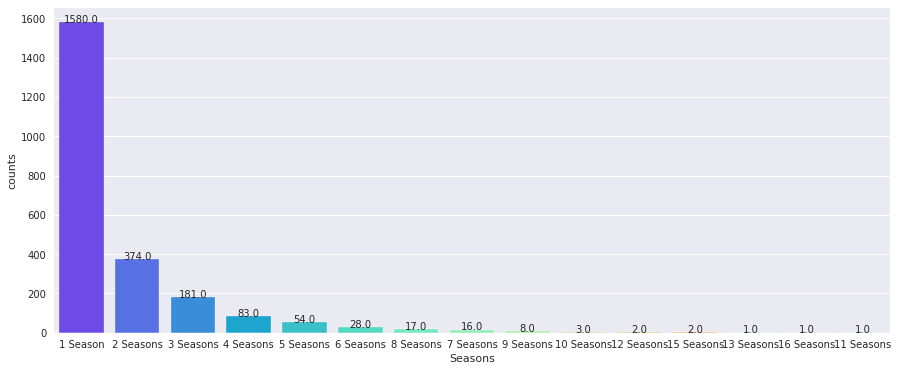

In [48]:
d=pd.DataFrame(t.duration.value_counts().rename_axis('Seasons').reset_index(name='counts'))
plt.figure(figsize = (15,6))
ax=sns.barplot(x=d.Seasons,y=d.counts,palette='rainbow')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}'.format(d.counts.values.tolist()[i]), (x, y), ha='center')
plt.show()

1. TV Shows has only 1 Season and it is not present in Season 2 and Season 3 category
2. In Season 2 and Season 3 Kids TV has higher proportion as compared to Season 1
3. TV Comedies having Season 2 is higher in number as compared to TV Dramas

#### Movies

In [49]:
def duration_conversion(x):
  list_n=x.split(' min')
  return float(list_n[0])

In [50]:
p['duration_new_col']=p['duration'].apply(lambda x: duration_conversion(x))

In [51]:
p.describe()

release_year  release_added_diff  duration_new_col
count   5326.000000         5326.000000       5326.000000
mean    2013.401990            5.079234         99.253661
std        8.137461            8.214730         28.276178
min     1970.000000           -1.000000          3.000000
25%     2012.000000            0.000000         86.000000
50%     2016.000000            1.000000         98.000000
75%     2018.000000            6.000000        114.000000
max     2021.000000           50.000000        312.000000

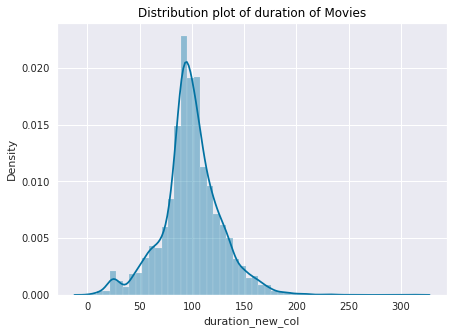

In [52]:
plt.figure(figsize=(7,5))
sns.distplot(p.duration_new_col)
plt.title('Distribution plot of duration of Movies',color='black')
plt.show()

Most of the movies have duration around 100 mins.

There is a tail towards the right beyond value 200, These seem to be rare movies with high value of duration

In [53]:
p[p.duration_new_col>200]

type                                          title  \
957   Movie                     Black Mirror: Bandersnatch   
2155  Movie                        Fifty Year Old Teenager   
3195  Movie                                   Jodhaa Akbar   
3282  Movie                       Kabhi Khushi Kabhie Gham   
3521  Movie                                         Lagaan   
3694  Movie                             Lock Your Girls In   
4484  Movie                   No Direction Home: Bob Dylan   
4490  Movie                                 No Longer kids   
5108  Movie                                Raya and Sakina   
6409  Movie                             The Gospel of Luke   
6507  Movie                                   The Irishman   
6616  Movie  The Lord of the Rings: The Return of the King   
6850  Movie                         The School of Mischief   
7574  Movie                           What's Your Raashee?   

                                     country date_added  release_year rating  \
957                            United States 2018-12-28          2018  TV-MA   
2155                           United States 2020-05-21          1996  TV-14   
3195                                   India 2018-10-01          2008  TV-14   
3282                                   India 2020-04-01          2001  TV-14   
3521                                   India 2021-01-10          2001     PG   
3694                           United States 2020-05-21          1982  TV-PG   
4484    United Kingdom, United States, Japan 2020-04-25          2005  TV-MA   
4490                                   Egypt 2020-05-21          1979  TV-14   
5108                           United States 2020-05-21          1984  TV-14   
6409  United States, United Kingdom, Morocco 2018-10-19          2015  TV-14   
6507                           United States 2019-11-27          2019      R   
6616              New Zealand, United States 2020-01-01          2003  PG-13   
6850                                   Egypt 2020-05-21          1973  TV-14   
7574                                   India 2020-08-15          2009  TV-PG   

     duration                                         listed_in  \
957   312 min    Dramas, International Movies, Sci-Fi & Fantasy   
2155  204 min                    Comedies, International Movies   
3195  214 min  Action & Adventure, Dramas, International Movies   
3282  209 min                      Dramas, International Movies   
3521  224 min    Dramas, International Movies, Music & Musicals   
3694  233 min   Comedies, International Movies, Romantic Movies   
4484  208 min                   Documentaries, Music & Musicals   
4490  237 min            Comedies, Dramas, International Movies   
5108  230 min            Comedies, Dramas, International Movies   
6409  205 min                      Dramas, Faith & Spirituality   
6507  209 min                                            Dramas   
6616  201 min              Action & Adventure, Sci-Fi & Fantasy   
6850  253 min            Comedies, Dramas, International Movies   
7574  203 min  Comedies, International Movies, Music & Musicals   

                                            description  release_added_diff  \
957   In 1984, a young programmer begins to question...                   0   
2155  The life of a married 50-year-old doctor turns...                  24   
3195  In 16th-century India, what begins as a strate...                  10   
3282  Years after his father disowns his adopted bro...                  19   
3521  In 1890s India, an arrogant British commander ...                  20   
3694  A widower believes he must marry off his three...                  38   
4484  Featuring rare concert footage and interviews ...                  15   
4490  Hoping to prevent their father from skipping t...                  41   
5108  When robberies and murders targeting women swe...                  36   
6409  Word-for-word Bible texts of the entire book o...                   3   


The movies with duration value greater than 200 are mostly old movies as these are added later on netflix after their official release except two movies Black Mirror and The Irishman	

### <b>Data Analysis based on Genre</b>

Genre can be an important factor to cluster netflix data. Therefore, carrying deatiled analysis based on genre

In [54]:
df.listed_in.value_counts()

Documentaries                                                                      332
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       319
Comedies, Dramas, International Movies                                             241
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Reality TV, TV Horror, TV Thrillers                                                  1
Classic & Cult TV, TV Horror, TV Mysteries                                           1
Dramas, Horror Movies, Sci-Fi & Fantasy                                              1
TV Comedies, TV Dramas, TV Sci-Fi & Fantasy                                          1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 480, dtype: int64

In [55]:
def unique_values(arr):
  ''' This method would return unique values from a dataframe series
  having multiple values of many records and would take series as input'''
  unique=set()
  val_count=arr.value_counts()
  for i in val_count.index:
    values=i.split(', ')
    for j in values:
      unique.add(j)
  return list(unique)

Method to create dummies based on unique genre values

In [56]:
def Create_dummy(df,col_name,spliter):
  ''' This method would create dummies of unique values 
  if diff values are grouped together in list in a series'''
  new_df=df.copy()
  un_genre=unique_values(new_df[col_name])

  #To convert string to list
  for index,value in enumerate(df[col_name]):
    new_df[col_name].iloc[index]=value.split(spliter)

  #To create columns of each unique value
  for i in un_genre:
    new_df[i]=0

  # To set value to 1 as per the each row value of col_name
  for index,value in new_df.iterrows():
    for j in value[col_name]:
      new_df.loc[index,j]=1
  return new_df

Creating a new dataframe dedicatedly for Genres to analyze it better

In [57]:
genre_df=df.copy()

In [58]:
pd.set_option('display.max_columns', None)
genre_df.head()

type  title        country date_added  release_year rating   duration  \
0  TV Show     3%         Brazil 2020-08-14          2020  TV-MA  4 Seasons   
1    Movie   7:19         Mexico 2016-12-23          2016  TV-MA     93 min   
2    Movie  23:59      Singapore 2018-12-20          2011      R     78 min   
3    Movie      9  United States 2017-11-16          2009  PG-13     80 min   
4    Movie     21  United States 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [59]:
un_genre=unique_values(df['listed_in'])
print(f'There are {len(un_genre)} following unique genres in this dataset:')
un_genre

There are 42 following unique genres in this dataset:


['Stand-Up Comedy',
 'TV Mysteries',
 'Horror Movies',
 'Stand-Up Comedy & Talk Shows',
 'Anime Features',
 'Thrillers',
 'Classic & Cult TV',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Spanish-Language TV Shows',
 'Classic Movies',
 'Teen TV Shows',
 'Docuseries',
 'LGBTQ Movies',
 'Comedies',
 'Sci-Fi & Fantasy',
 'International TV Shows',
 'Korean TV Shows',
 'Romantic TV Shows',
 'British TV Shows',
 'TV Comedies',
 'Crime TV Shows',
 'Movies',
 'Sports Movies',
 'Reality TV',
 'Documentaries',
 'Action & Adventure',
 'TV Action & Adventure',
 'Romantic Movies',
 'Dramas',
 'TV Dramas',
 'Children & Family Movies',
 'Cult Movies',
 'Faith & Spirituality',
 'TV Horror',
 'Anime Series',
 'International Movies',
 'Independent Movies',
 "Kids' TV",
 'Music & Musicals',
 'TV Shows',
 'Science & Nature TV']

In [60]:
genre_df=Create_dummy(genre_df,'listed_in',', ')

In [61]:
genre_df.head()

type  title        country date_added  release_year rating   duration  \
0  TV Show     3%         Brazil 2020-08-14          2020  TV-MA  4 Seasons   
1    Movie   7:19         Mexico 2016-12-23          2016  TV-MA     93 min   
2    Movie  23:59      Singapore 2018-12-20          2011      R     78 min   
3    Movie      9  United States 2017-11-16          2009  PG-13     80 min   
4    Movie     21  United States 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...   
1                     [Dramas, International Movies]   
2              [Horror Movies, International Movies]   
3  [Action & Adventure, Independent Movies, Sci-F...   
4                                           [Dramas]   

                                         description  Stand-Up Comedy  \
0  In a future where the elite inhabit an island ...                0   
1  After a devastating earthquake hits Mexico Cit...                0   
2  When an army recruit is found dead, his fellow...                0   
3  In a postapocalyptic world, rag-doll robots hi...                0   
4  A brilliant group of students become card-coun...                0   

   TV Mysteries  Horror Movies  Stand-Up Comedy & Talk Shows  Anime Features  \
0             0              0                             0               0   
1             0              0                             0               0   
2             0              1                             0               0   
3             0              0                             0               0   
4             0              0                             0               0   

   Thrillers  Classic & Cult TV  TV Sci-Fi & Fantasy  TV Thrillers  \
0          0                  0                    1             0   
1          0                  0                    0             0   
2          0                  0                    0             0   
3          0                  0                    0             0   
4          0                  0                    0             0   

   Spanish-Language TV Shows  Classic Movies  Teen TV Shows  Docuseries  \
0                          0               0              0           0   
1                          0               0              0           0   
2                          0               0              0           0   
3                          0               0              0           0   
4                          0               0              0           0   

   LGBTQ Movies  Comedies  Sci-Fi & Fantasy  International TV Shows  \
0             0         0                 0                       1   
1             0         0                 0                       0   
2             0         0                 0                       0   
3             0         0                 1                       0   
4             0         0                 0                       0   

   Korean TV Shows  Romantic TV Shows  British TV Shows  TV Comedies  \
0                0                  0                 0            0   
1                0                  0                 0            0   
2                0                  0                 0            0   
3                0                  0                 0            0   
4                0                  0                 0            0   

   Crime TV Shows  Movies  Sports Movies  Reality TV  Documentaries  \
0               0       0              0           0              0   
1               0       0              0           0              0   
2               0       0              0           0              0   
3               0       0              0           0              0   
4               0       0              0           0              0   

   Action & Adventure  TV Action & Adventure  Romantic Movies  Dramas  \
0                   0                     

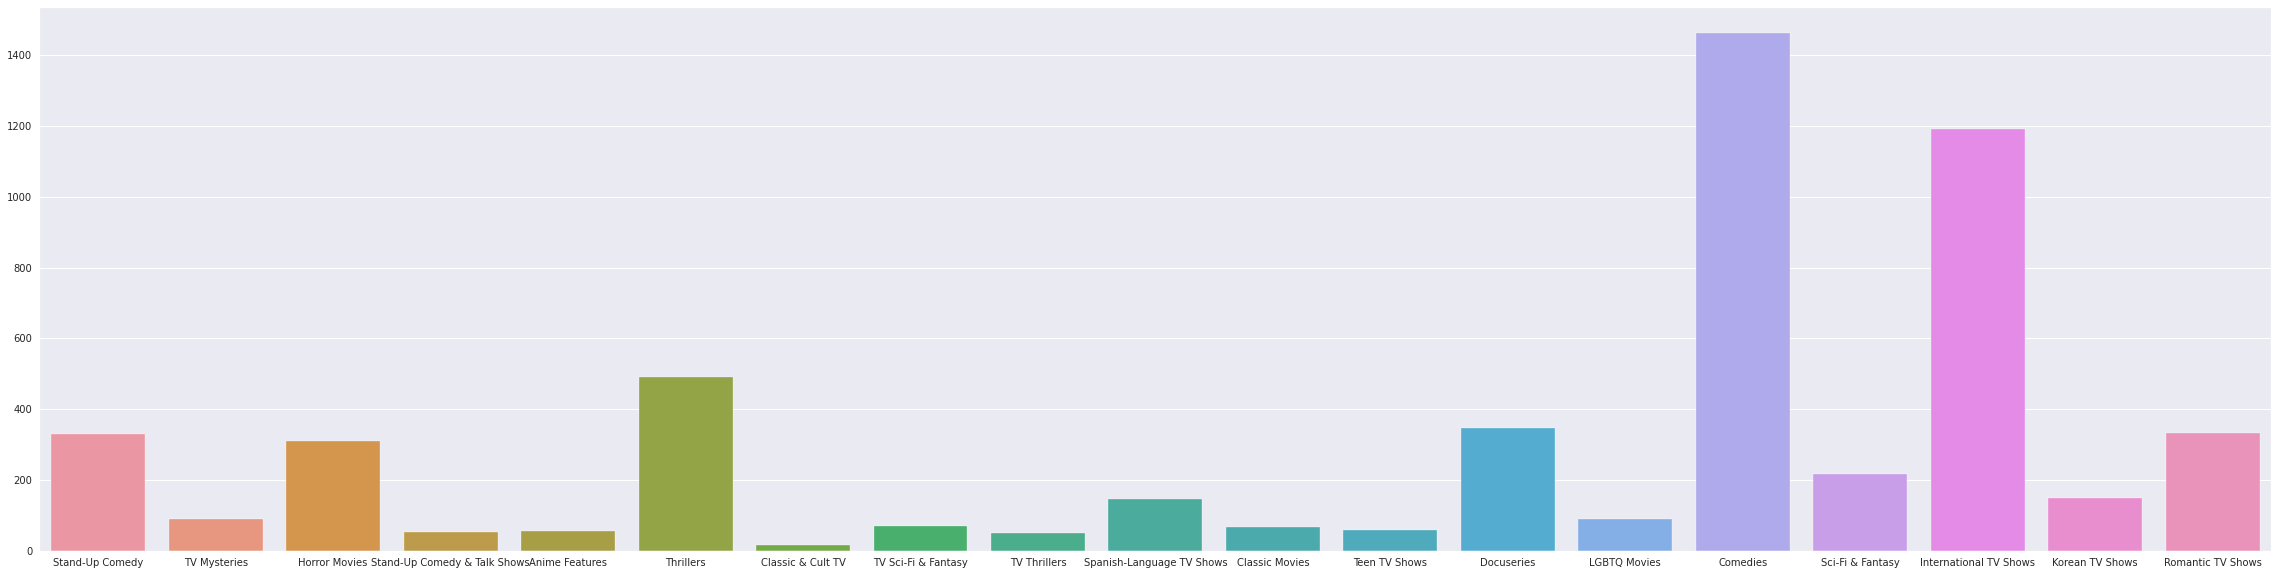

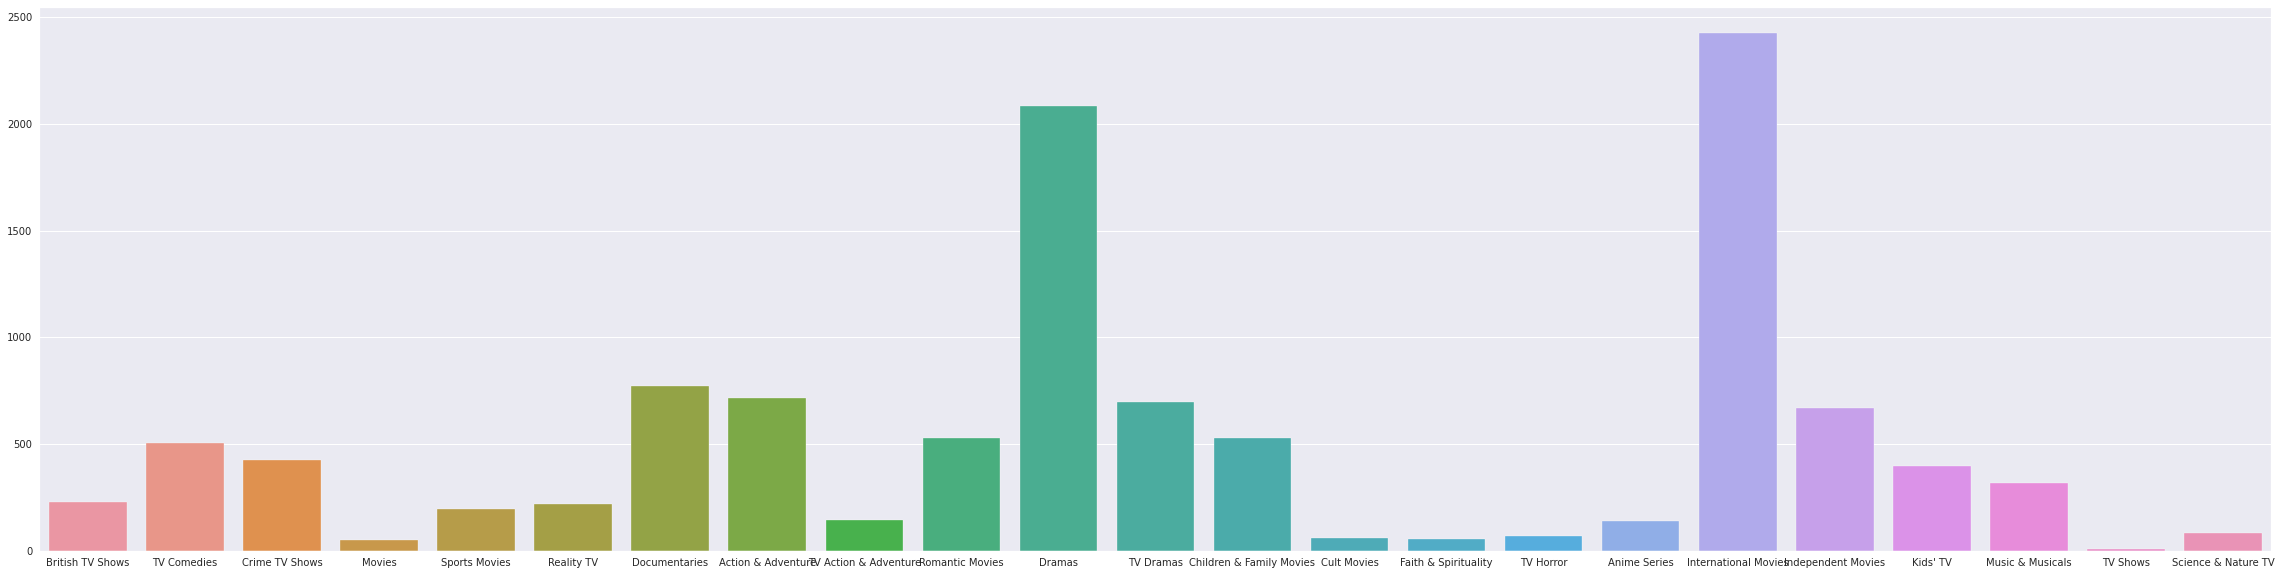

In [62]:
plt.figure(figsize = (40,10))
sns.set_style(style='darkgrid')
new_dict={}
values,num=[],0
for i in un_genre:
  new_dict[i]=np.sum(genre_df[i])
  values.append(np.sum(genre_df[i]))
sns.barplot(x=un_genre[0:19],y=values[0:19])
plt.show()
plt.figure(figsize = (40,10))
#Plotting two different graphs for better visualization of 42 unique genres
sns.barplot(x=un_genre[19:42],y=values[19:42])
plt.show()

Majority of records has International Movies and Dramas as genre.


#### <b>Genre Analysis Based on TV Shows</b>

##### 1. Fecthing number of records of each Genre Type

In [63]:
TV_show_genre=genre_df[genre_df.type=='TV Show']
new_dict={}
values,keys,num=[],[],0
for i in un_genre:
  if(np.sum(TV_show_genre[i])>0):
    new_dict[i]=np.sum(TV_show_genre[i])
    values.append(np.sum(genre_df[i]))
    keys.append(i)
new_dict

{'Anime Series': 140,
 'British TV Shows': 227,
 'Classic & Cult TV': 16,
 'Crime TV Shows': 424,
 'Docuseries': 348,
 'International TV Shows': 1191,
 "Kids' TV": 395,
 'Korean TV Shows': 150,
 'Reality TV': 220,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'Spanish-Language TV Shows': 145,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Action & Adventure': 146,
 'TV Comedies': 506,
 'TV Dramas': 698,
 'TV Horror': 69,
 'TV Mysteries': 90,
 'TV Sci-Fi & Fantasy': 70,
 'TV Shows': 8,
 'TV Thrillers': 49,
 'Teen TV Shows': 58}

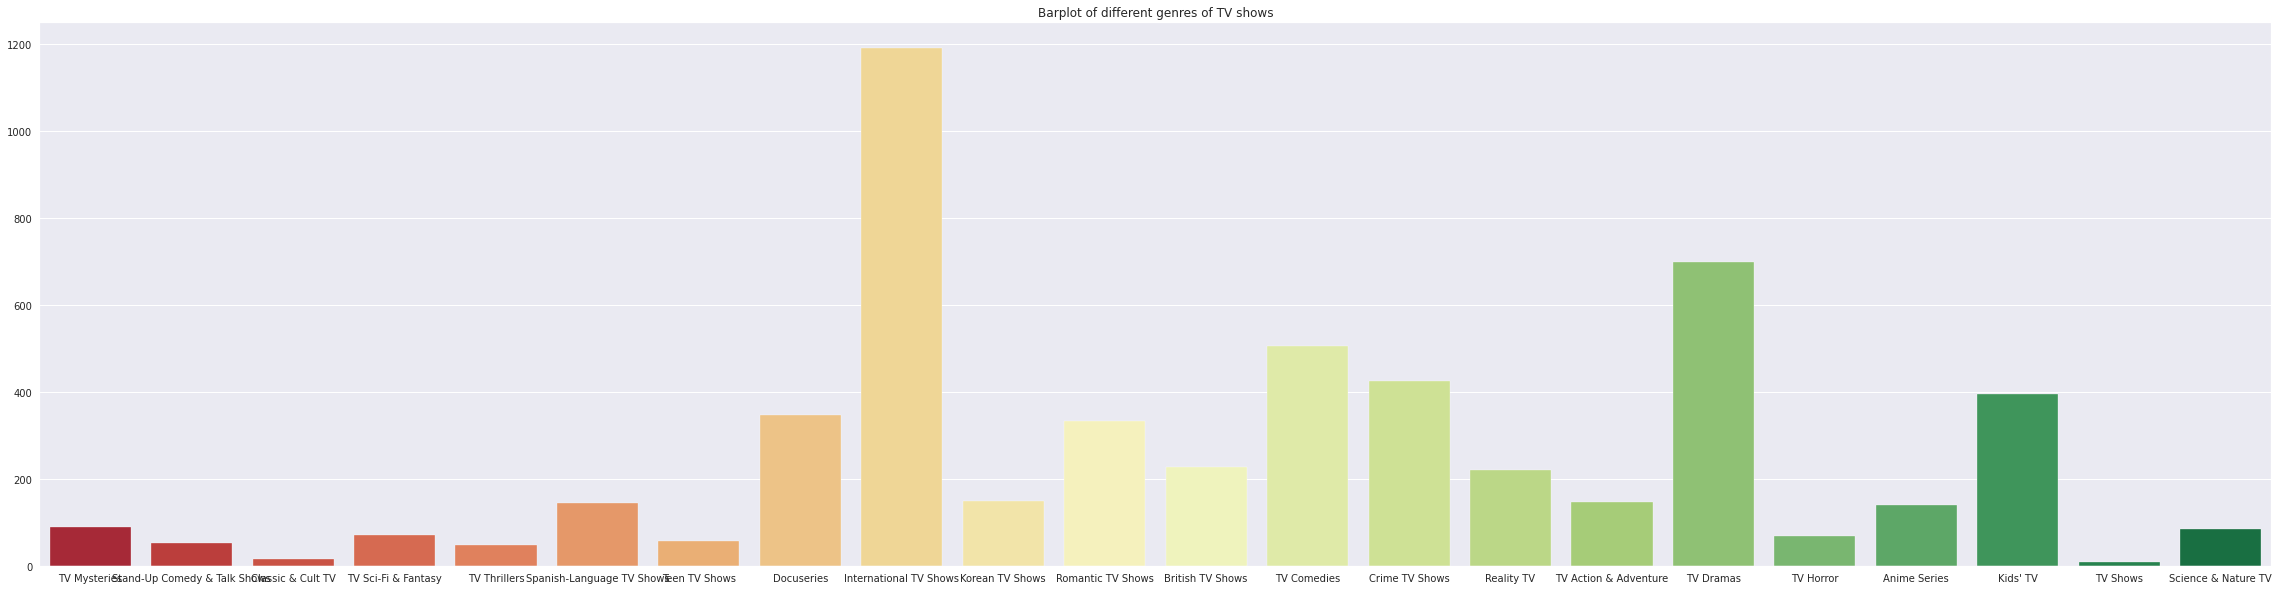

In [64]:
plt.figure(figsize = (40,10))
sns.barplot(x=keys,y=values,palette='RdYlGn')
plt.title('Barplot of different genres of TV shows')
plt.show()

International TV shows dominates over all the genres of TV shows with count of 1197 followed by TV Dramas and TV comedies with number 703 and 513 respectively.

##### 2. Genre analysis based on duration of TV shows

Since there are maximum records of Season 1 and Season 2 and Season 3. Hence, visulaizing genre for top 3 values of Duration of TV shows.

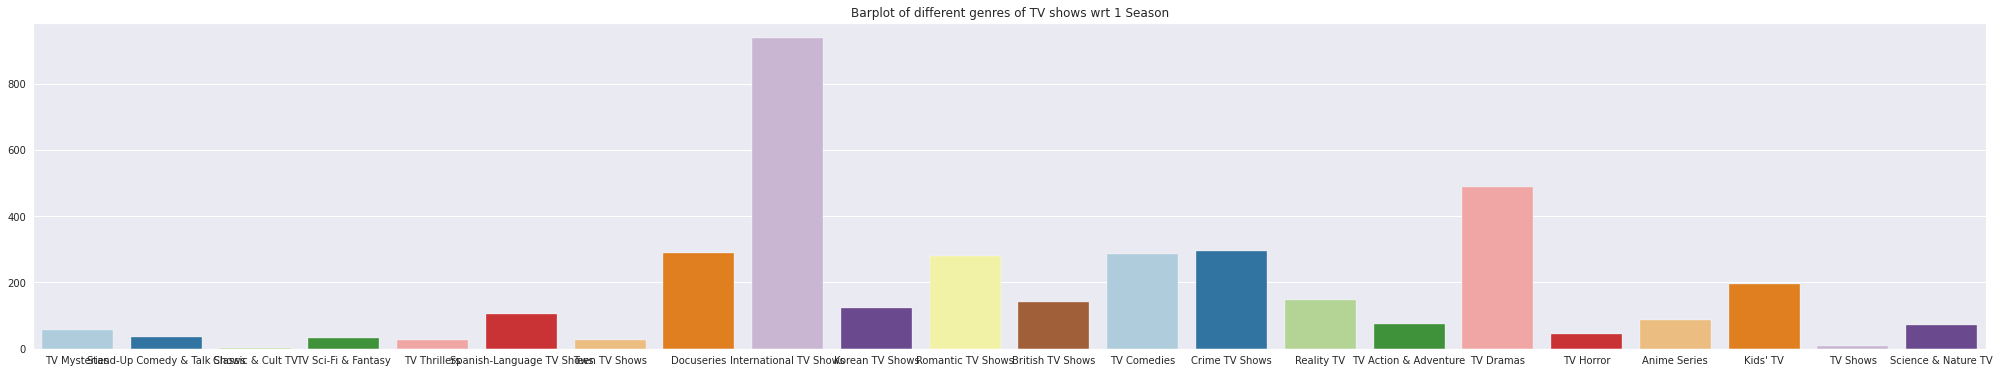

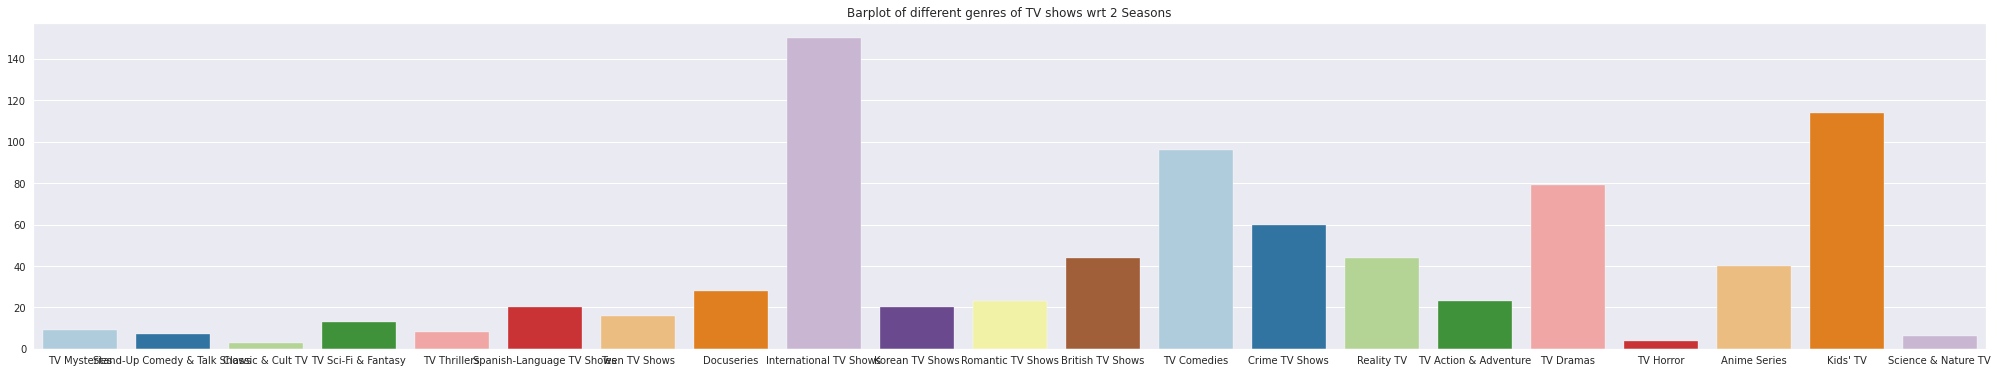

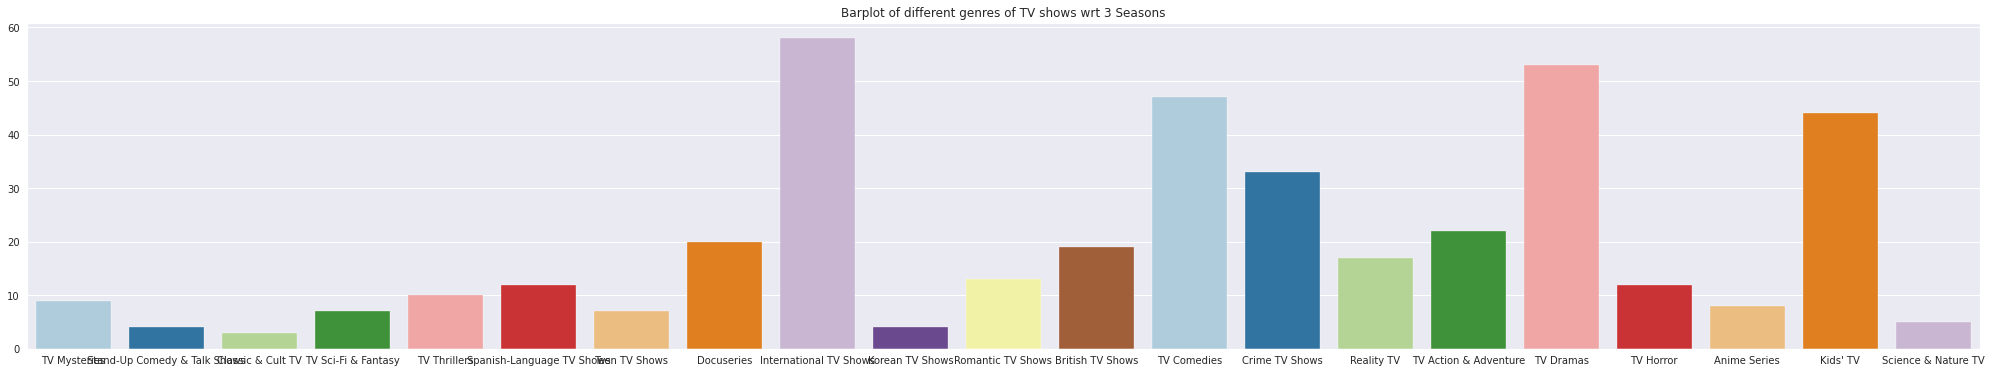

In [65]:
list_season=['1 Season','2 Seasons','3 Seasons']
for j in list_season:
  a=genre_df[genre_df['duration']==j]
  new_dict={}
  values,keys,num=[],[],0
  for i in un_genre:
    if(np.sum(a[i])>0):
      new_dict[i]=np.sum(a[i])
      values.append(np.sum(a[i]))
      keys.append(i)
  plt.figure(figsize = (35,6))
  sns.barplot(x=keys,y=values,palette='Paired')
  plt.title('Barplot of different genres of TV shows wrt '+j)
  plt.show()

#### Genre Analysis Based on Movies

##### 1. Fecthing number of records of each Genre Type

In [66]:
Movie_genre=genre_df[genre_df.type=='Movie']
new_dict={}
values,keys,num=[],[],0
for i in un_genre:
  if(np.sum(Movie_genre[i])>0):
    new_dict[i]=np.sum(Movie_genre[i])
    values.append(np.sum(genre_df[i]))
    keys.append(i)
new_dict

{'Action & Adventure': 714,
 'Anime Features': 57,
 'Children & Family Movies': 530,
 'Classic Movies': 66,
 'Comedies': 1463,
 'Cult Movies': 58,
 'Documentaries': 772,
 'Dramas': 2082,
 'Faith & Spirituality': 57,
 'Horror Movies': 311,
 'Independent Movies': 670,
 'International Movies': 2425,
 'LGBTQ Movies': 89,
 'Movies': 52,
 'Music & Musicals': 319,
 'Romantic Movies': 527,
 'Sci-Fi & Fantasy': 217,
 'Sports Movies': 196,
 'Stand-Up Comedy': 329,
 'Thrillers': 490}

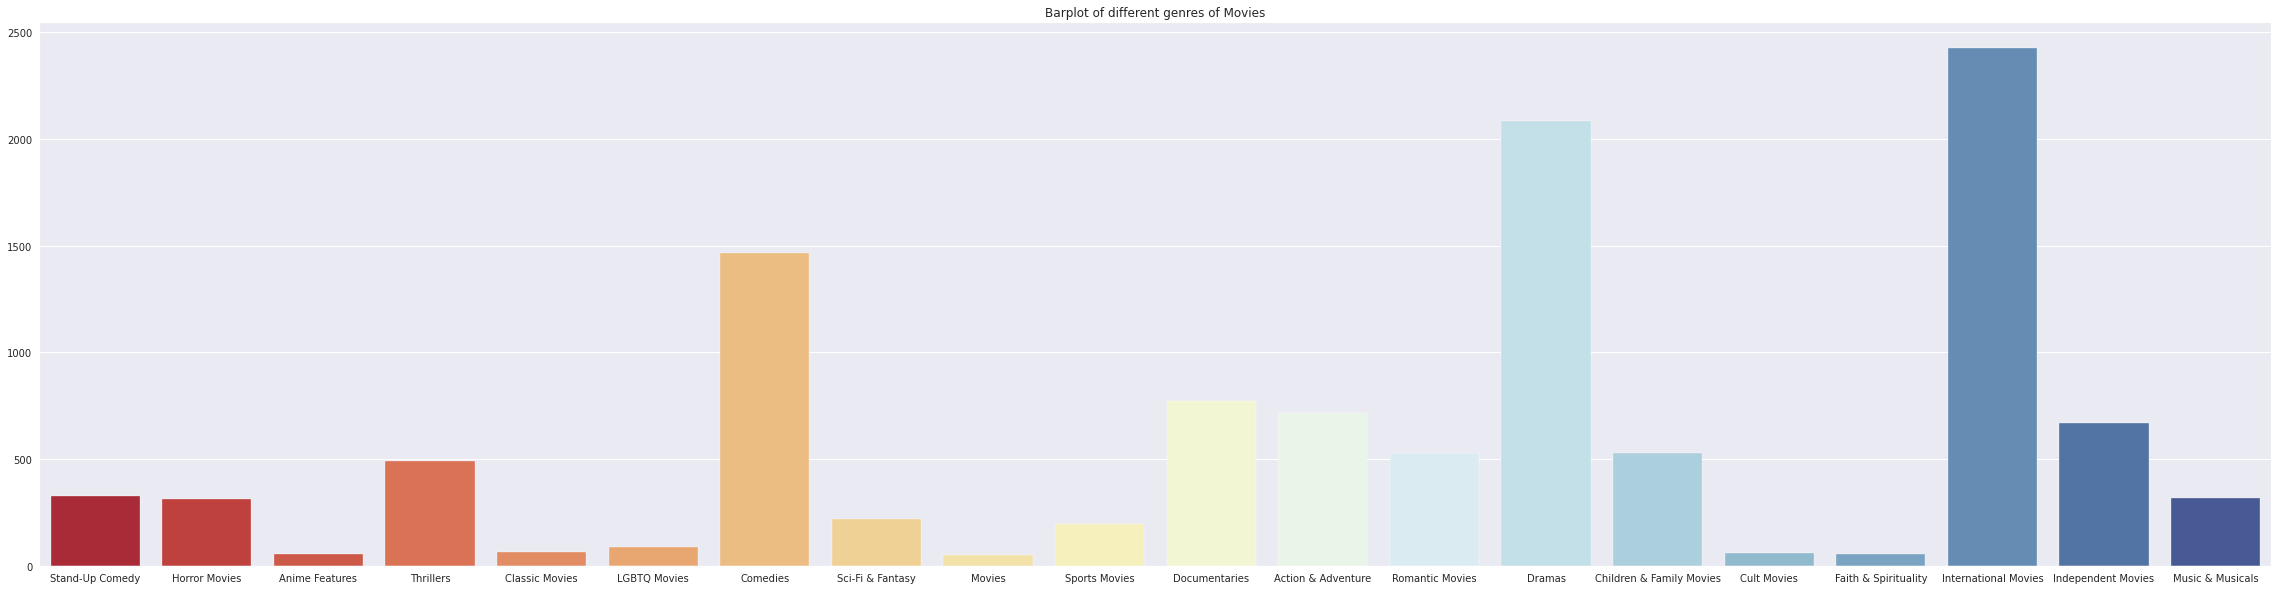

In [67]:
plt.figure(figsize = (40,10))
sns.barplot(x=keys,y=values,palette='RdYlBu')
plt.title('Barplot of different genres of Movies')
plt.show()

Most of the movies belong to International Movies, Dramas,Comedies genres as these are top 3 genres and rest of other movies are divided among other genres.

##### 2. Genre Analysis based on duration of movies

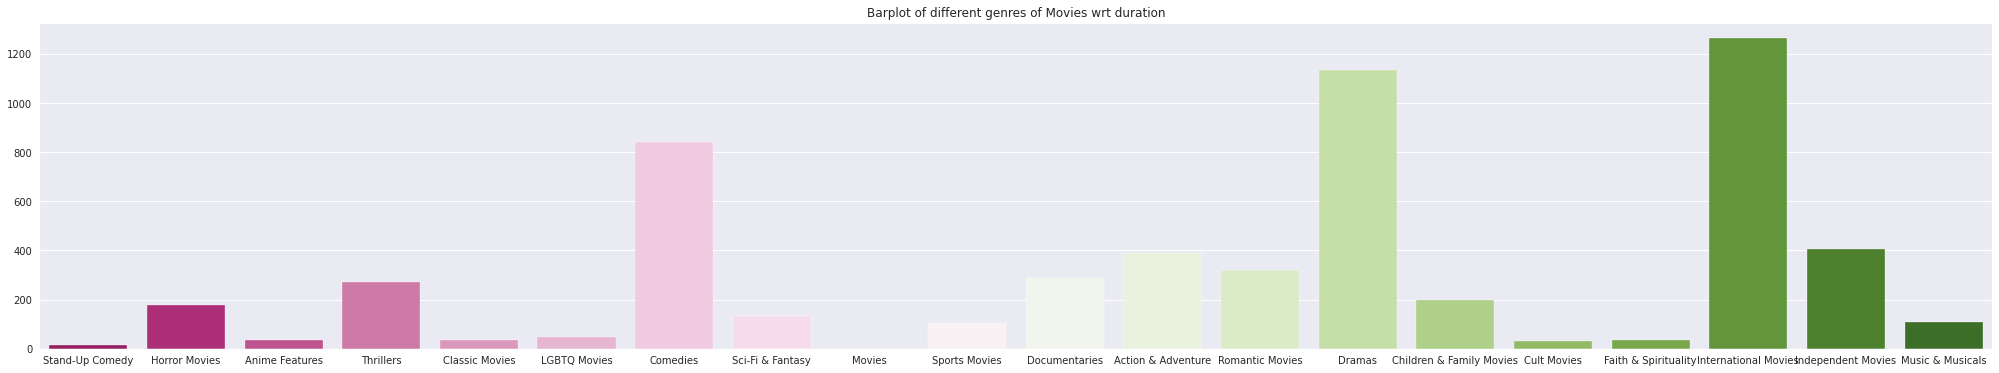

In [68]:
Movie_genre['duration']=p['duration'].apply(lambda x: duration_conversion(x))
a=Movie_genre[(Movie_genre['duration']>90) & (Movie_genre.duration<=120)]
new_dict={}
values,keys,num=[],[],0
for i in un_genre:
  if(np.sum(a[i])>0):
    new_dict[i]=np.sum(a[i])
    values.append(np.sum(a[i]))
    keys.append(i)
plt.figure(figsize = (35,6))
sns.barplot(x=keys,y=values,palette='PiYG')
plt.title('Barplot of different genres of Movies wrt duration')
plt.show()

### <b>Analysis based on Title and Description</b>

#### TV Shows

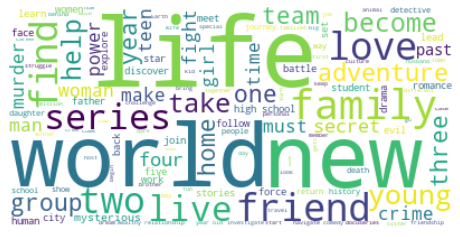

In [69]:
plt.figure(figsize=(8,8))
df_wordcloud = TV_show_genre['description']
text = " ".join(word for word in df_wordcloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

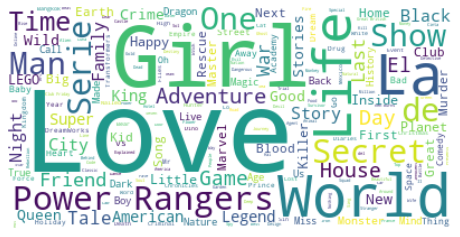

In [70]:
plt.figure(figsize=(8,8))
df_wordcloud = TV_show_genre['title']
text = " ".join(word for word in df_wordcloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We could make from above two plots that mostly TV shows are about Love, Life, World, Friend.

#### Movies

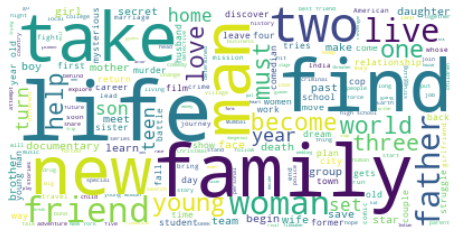

In [71]:
plt.figure(figsize=(8,8))
df_wordcloud = Movie_genre['description']
text = " ".join(word for word in df_wordcloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

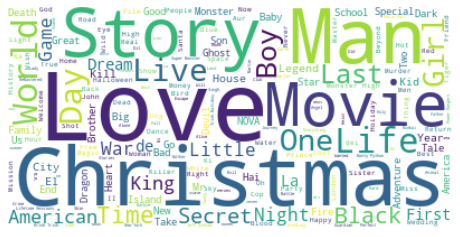

In [72]:
plt.figure(figsize=(8,8))
df_wordcloud = Movie_genre['title']
text = " ".join(word for word in df_wordcloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### <b>Understanding the type of Content available in each Country</b>

Creating a new dataframe including countries and genres 

In [73]:
genre_df.country.value_counts()

United States                                                   3001
India                                                            918
United Kingdom                                                   392
Japan                                                            219
South Korea                                                      183
                                                                ... 
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Germany, Australia, France, China                                  1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 677, dtype: int64

In [74]:
un_country=unique_values(genre_df['country'])
print(f'There are {len(un_country)} following unique Countries in this dataset:')
print(un_country)

There are 120 following unique Countries in this dataset:
['Cayman Islands', 'Indonesia', 'Namibia', 'Malawi', 'Bahamas', 'Vietnam', 'United States', 'Sweden', 'Panama', 'Italy', 'Hong Kong', 'Czech Republic', 'Iran', 'Chile', 'Luxembourg', 'United Kingdom', 'Argentina', 'Venezuela', 'Afghanistan', 'Puerto Rico', 'Samoa', 'Colombia', 'Croatia', 'Canada', 'Iraq', 'Morocco', 'Soviet Union', 'Philippines', 'Denmark', 'India', 'Sri Lanka', 'United States,', 'Georgia', 'Cuba', 'Montenegro', 'Dominican Republic', 'France', 'China', 'Poland', 'Uruguay', 'United Kingdom,', 'South Africa', 'East Germany', 'Nicaragua', 'Armenia', 'Lebanon', 'United Arab Emirates', 'Cambodia,', 'Saudi Arabia', 'Jamaica', 'Guatemala', 'Kenya', 'Lithuania', 'Thailand', 'Singapore', 'Kuwait', 'Sudan', 'West Germany', 'Angola', 'Poland,', 'Jordan', 'Egypt', 'Belarus', 'Paraguay', 'Hungary', 'Kazakhstan', 'Nigeria', 'Belgium', 'Romania', 'Botswana', 'Turkey', 'South Korea', 'Australia', 'Brazil', 'Ghana', 'Zimbabwe', 

In [75]:
country_df=Create_dummy(genre_df,'country',', ')

In [76]:
country_df.head()

type  title          country date_added  release_year rating   duration  \
0  TV Show     3%         [Brazil] 2020-08-14          2020  TV-MA  4 Seasons   
1    Movie   7:19         [Mexico] 2016-12-23          2016  TV-MA     93 min   
2    Movie  23:59      [Singapore] 2018-12-20          2011      R     78 min   
3    Movie      9  [United States] 2017-11-16          2009  PG-13     80 min   
4    Movie     21  [United States] 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  [International TV Shows, TV Dramas, TV Sci-Fi ...   
1                     [Dramas, International Movies]   
2              [Horror Movies, International Movies]   
3  [Action & Adventure, Independent Movies, Sci-F...   
4                                           [Dramas]   

                                         description  Stand-Up Comedy  \
0  In a future where the elite inhabit an island ...                0   
1  After a devastating earthquake hits Mexico Cit...                0   
2  When an army recruit is found dead, his fellow...                0   
3  In a postapocalyptic world, rag-doll robots hi...                0   
4  A brilliant group of students become card-coun...                0   

   TV Mysteries  Horror Movies  Stand-Up Comedy & Talk Shows  Anime Features  \
0             0              0                             0               0   
1             0              0                             0               0   
2             0              1                             0               0   
3             0              0                             0               0   
4             0              0                             0               0   

   Thrillers  Classic & Cult TV  TV Sci-Fi & Fantasy  TV Thrillers  \
0          0                  0                    1             0   
1          0                  0                    0             0   
2          0                  0                    0             0   
3          0                  0                    0             0   
4          0                  0                    0             0   

   Spanish-Language TV Shows  Classic Movies  Teen TV Shows  Docuseries  \
0                          0               0              0           0   
1                          0               0              0           0   
2                          0               0              0           0   
3                          0               0              0           0   
4                          0               0              0           0   

   LGBTQ Movies  Comedies  Sci-Fi & Fantasy  International TV Shows  \
0             0         0                 0                       1   
1             0         0                 0                       0   
2             0         0                 0                       0   
3             0         0                 1                       0   
4             0         0                 0                       0   

   Korean TV Shows  Romantic TV Shows  British TV Shows  TV Comedies  \
0                0                  0                 0            0   
1                0                  0                 0            0   
2                0                  0                 0            0   
3                0                  0                 0            0   
4                0                  0                 0            0   

   Crime TV Shows  Movies  Sports Movies  Reality TV  Documentaries  \
0               0       0              0           0              0   
1               0       0              0           0              0   
2               0       0              0           0              0   
3               0       0              0           0              0   
4               0       0              0           0              0   

   Action & Adventure  TV Action & Adventure  Romantic Movies  Dramas  \
0                   0         

#### Visualization of Data based on Countries

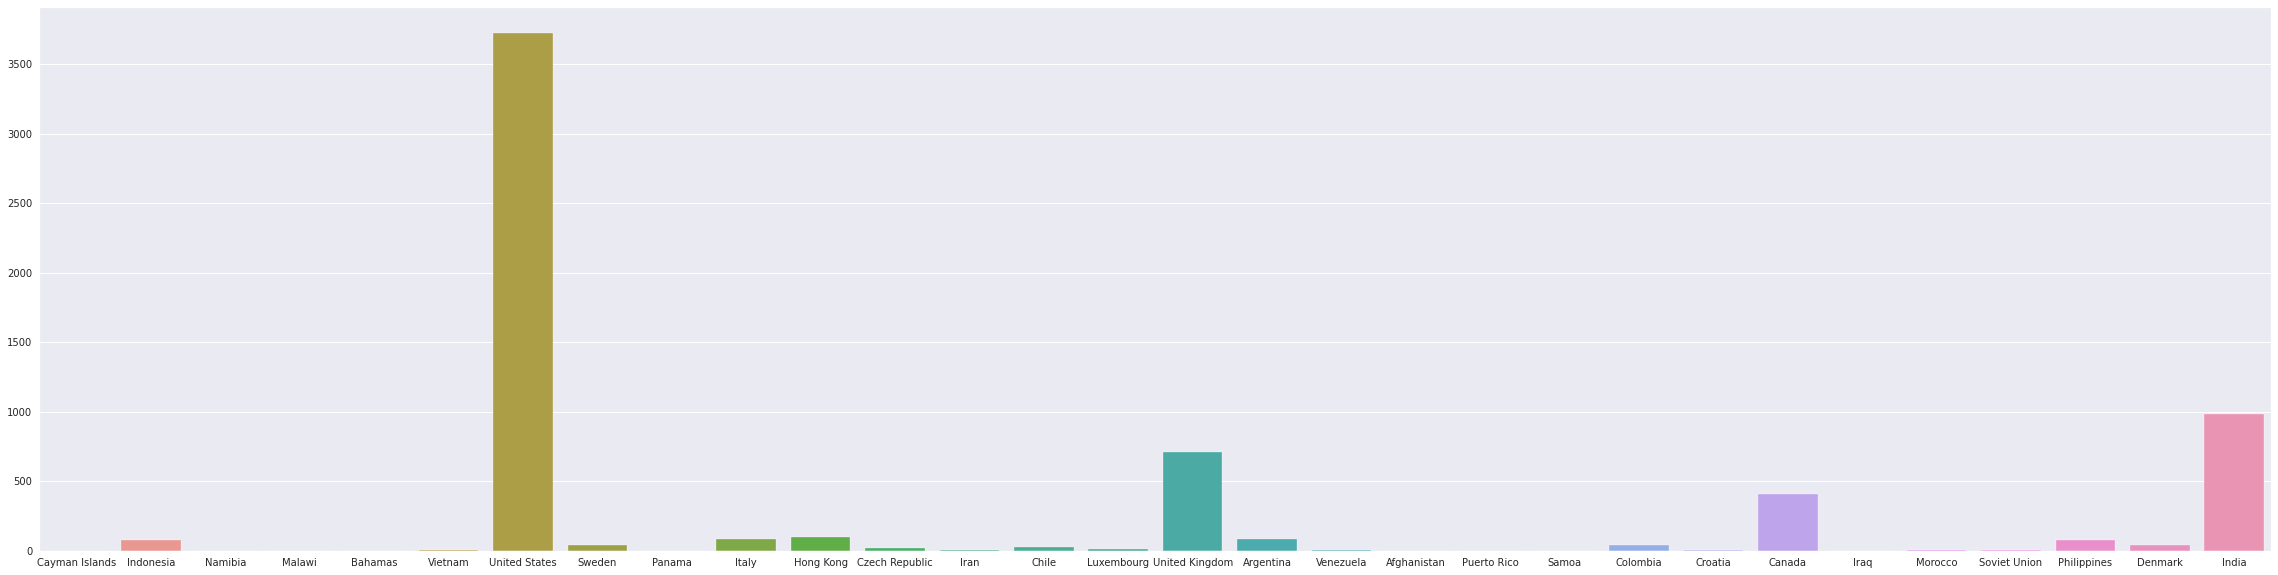

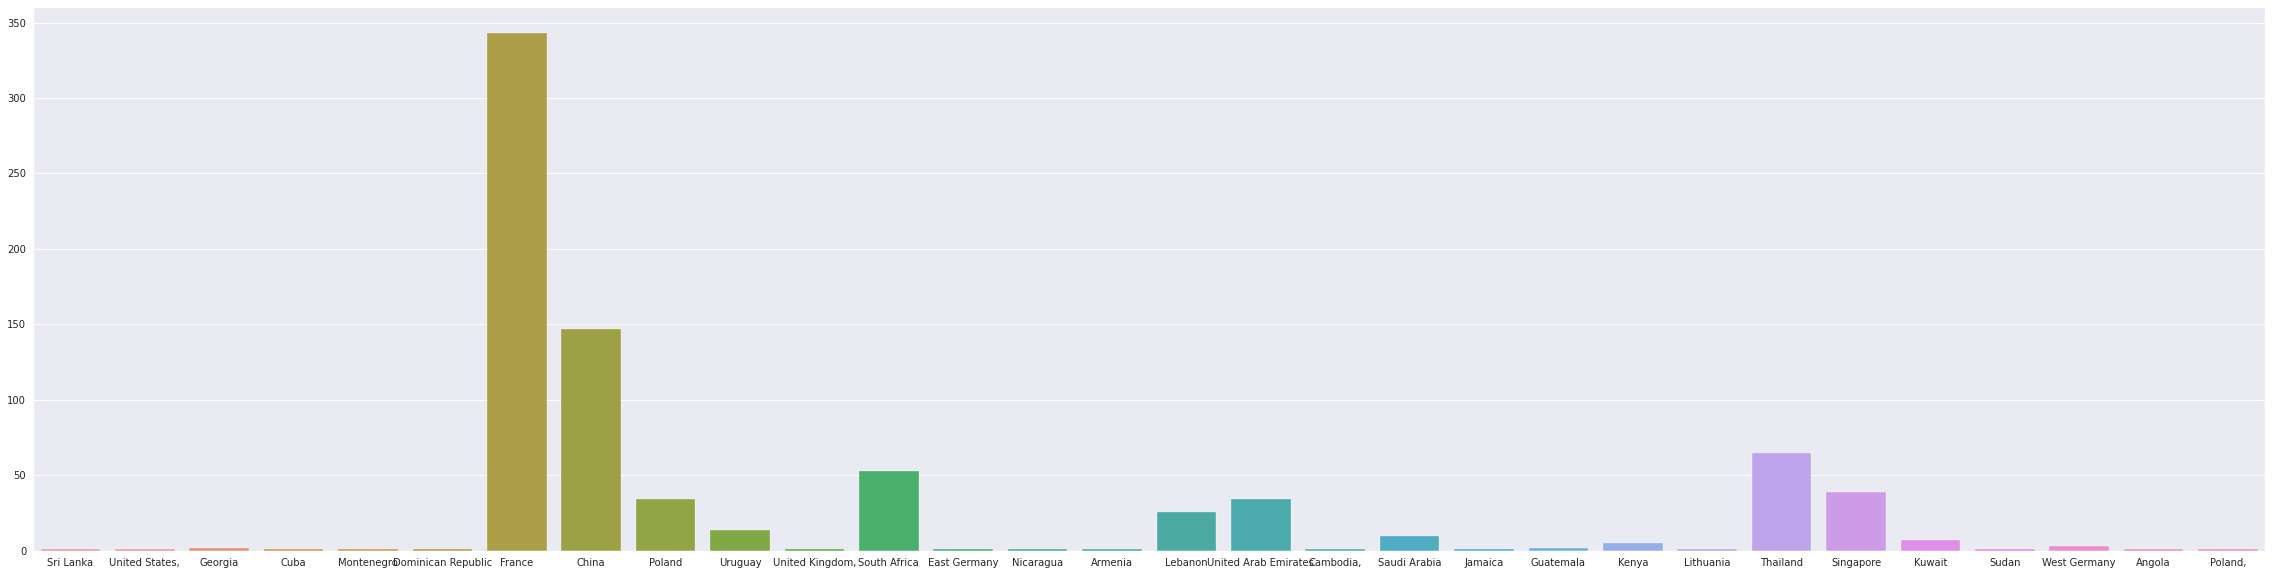

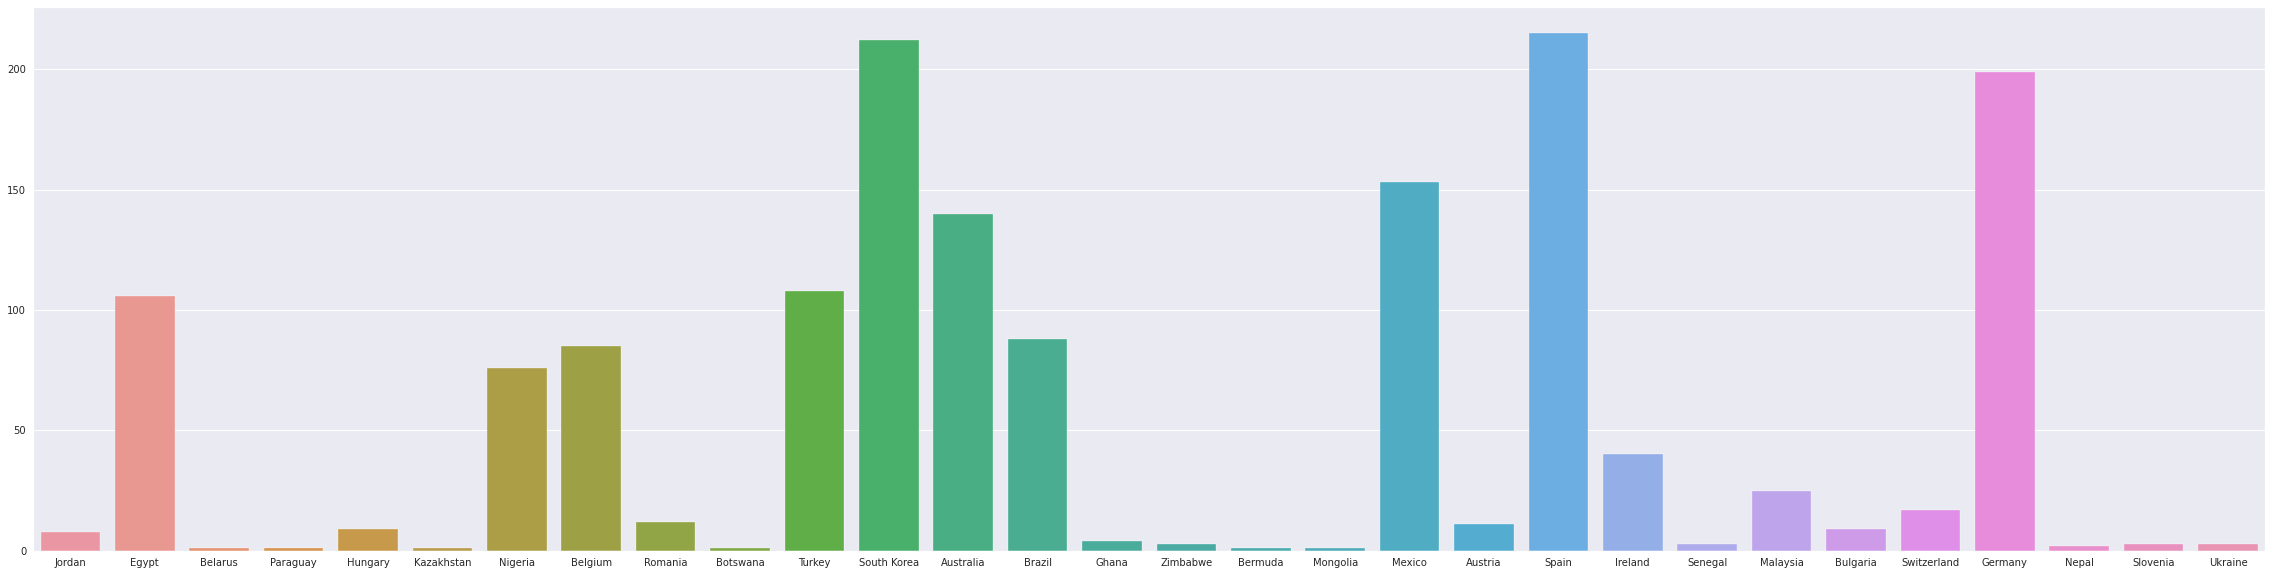

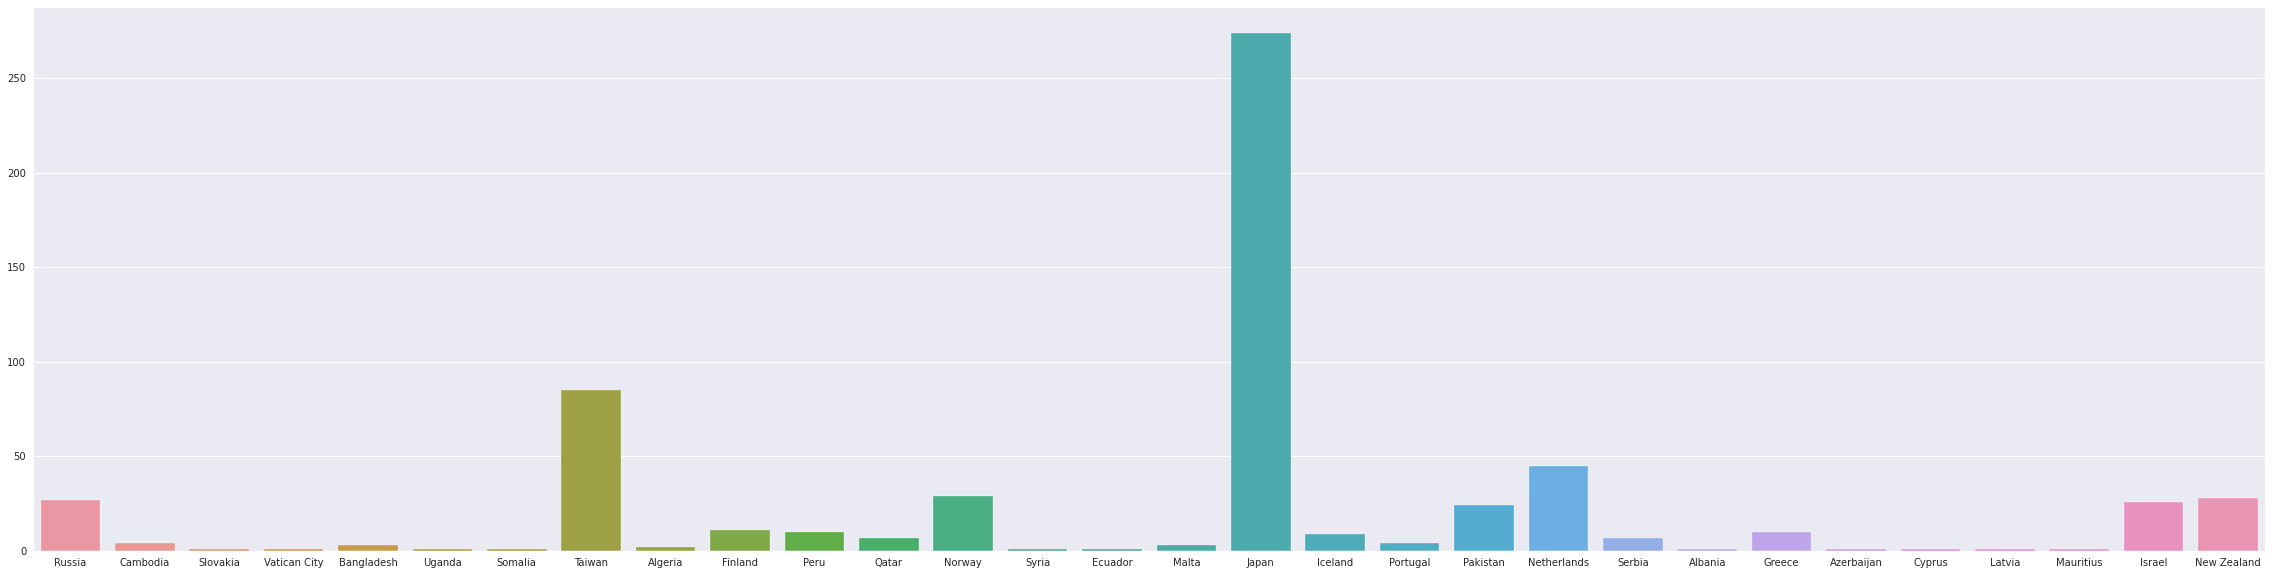

In [77]:
plt.figure(figsize = (40,10))
sns.set_style(style='darkgrid')
new_dict={}
values,num=[],0
for i in un_country:
  new_dict[i]=np.sum(country_df[i])
  values.append(np.sum(country_df[i]))
sns.barplot(x=un_country[0:30],y=values[0:30])
plt.show()
#Plotting two different graphs for better visualization of 120 unique countries
plt.figure(figsize = (40,10))
sns.barplot(x=un_country[30:60],y=values[30:60])
plt.show()
plt.figure(figsize = (40,10))
sns.barplot(x=un_country[60:90],y=values[60:90])
plt.show()
plt.figure(figsize = (40,10))
sns.barplot(x=un_country[90:120],y=values[90:120])
plt.show()

##### Data Visualization of countries based on Movies

In [78]:
country_movie=country_df[country_df.type=='Movie']
new_dict={}
values,keys,num=[],[],0
for i in un_country:
  if(np.sum(country_movie[i])>0):
    new_dict[i]=np.sum(country_movie[i])
    values.append(np.sum(country_df[i]))
    keys.append(i)
new_df=pd.DataFrame({'Country':new_dict.keys(),'Count':new_dict.values()})
new_df.head(10)

Country  Count
0  Cayman Islands      2
1       Indonesia     77
2         Namibia      2
3          Malawi      1
4         Bahamas      1
5         Vietnam      5
6   United States   2623
7          Sweden     29
8          Panama      1
9           Italy     62

In [79]:
new_df.describe()

Count
count   113.000000
mean     59.991150
std     264.377993
min       1.000000
25%       1.000000
50%       6.000000
75%      28.000000
max    2623.000000

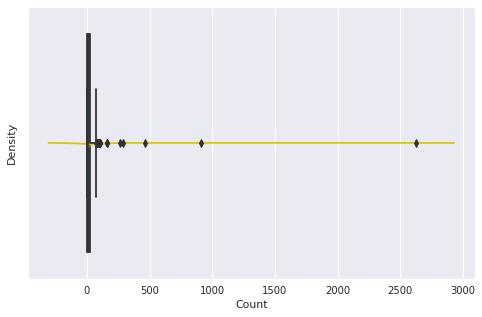

In [80]:
plt.figure(figsize=(8,5))
sns.distplot(new_df['Count'],color='y')
sns.boxplot(new_df['Count'])
plt.show()

In [81]:
top_country_movie=new_df[new_df.Count>200]
top_country_movie

Country  Count
6    United States   2623
15  United Kingdom    462
22          Canada    286
28           India    909
34          France    264

Countries above have produced the most number of content of movies on netflix

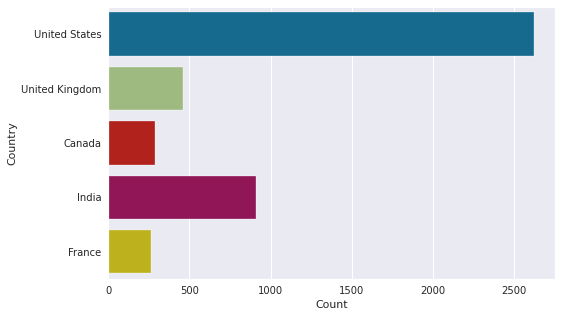

In [82]:
plt.figure(figsize=(8,5))
sns.barplot(y=top_country_movie['Country'],x=top_country_movie['Count'])
plt.show()

Visualizing genres produced by these top 5 countries

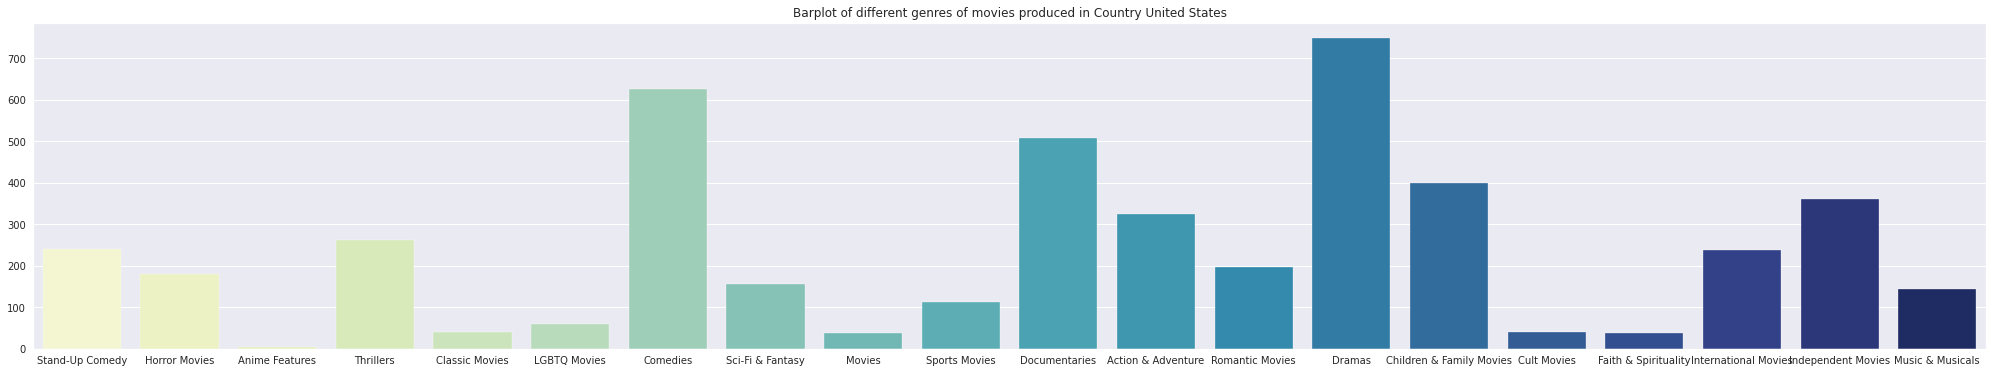

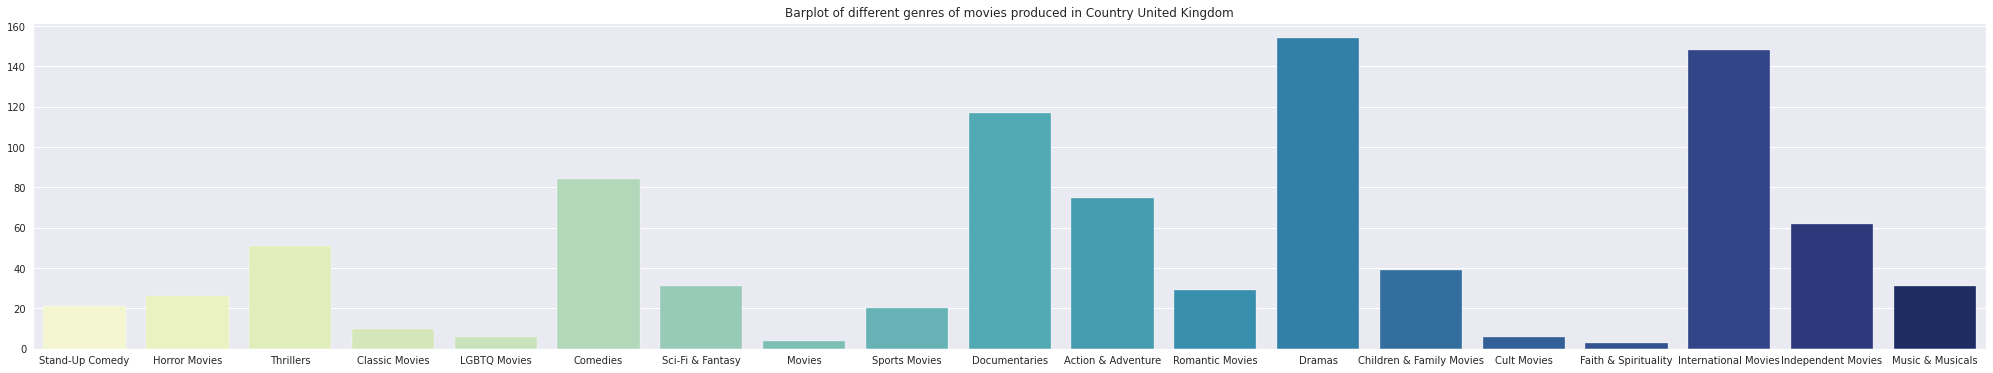

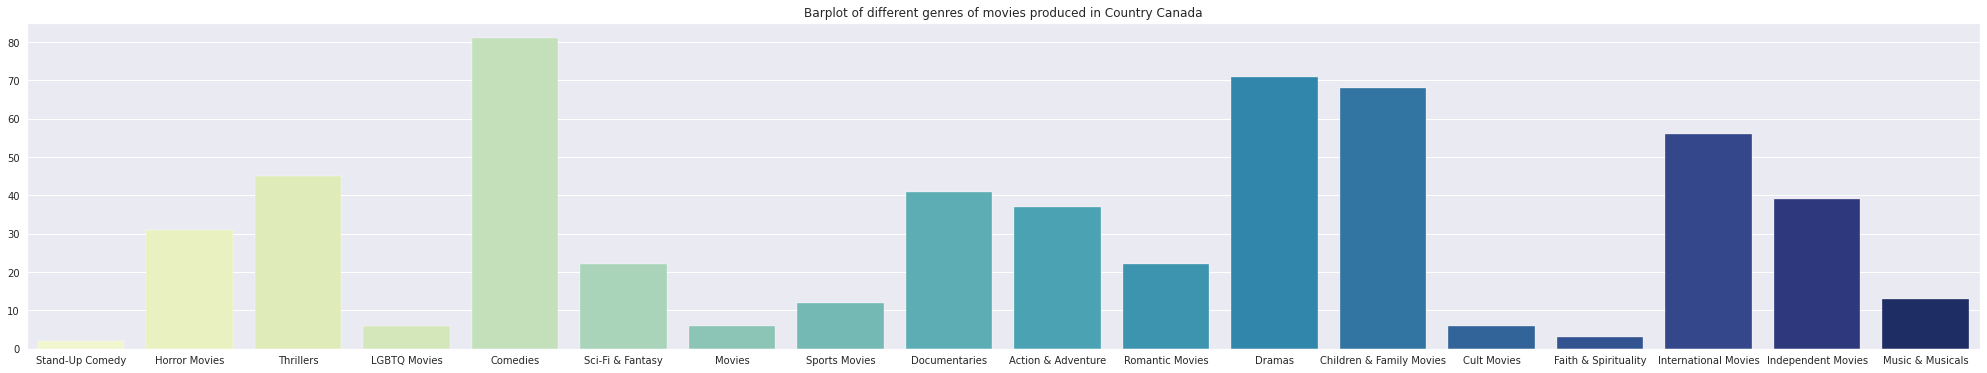

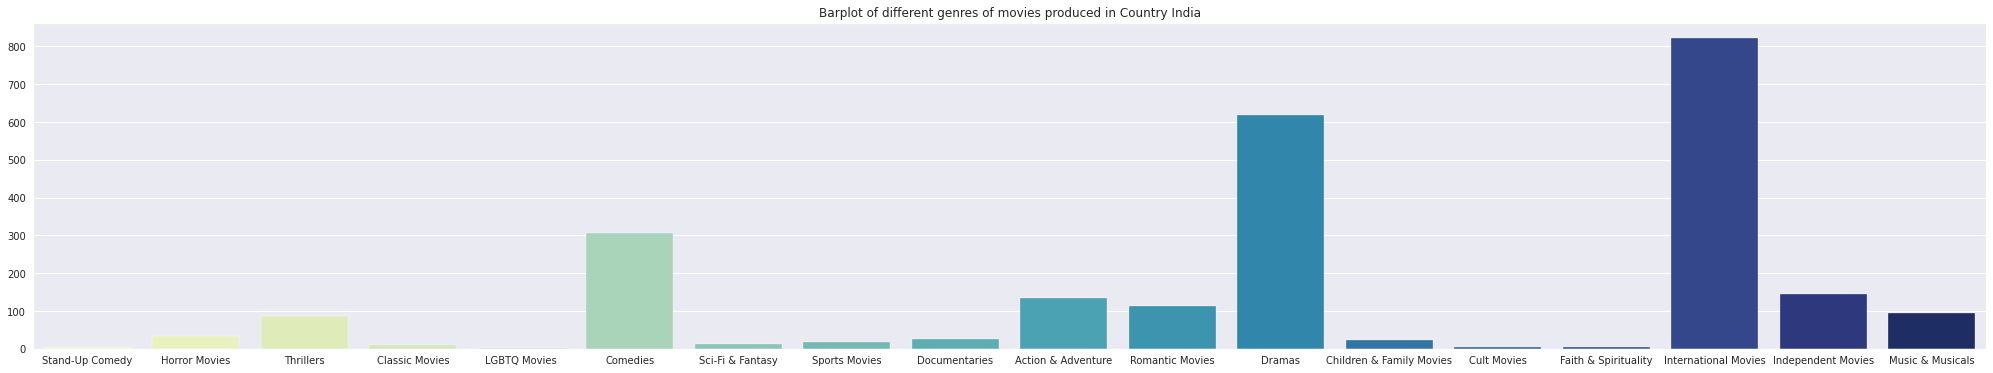

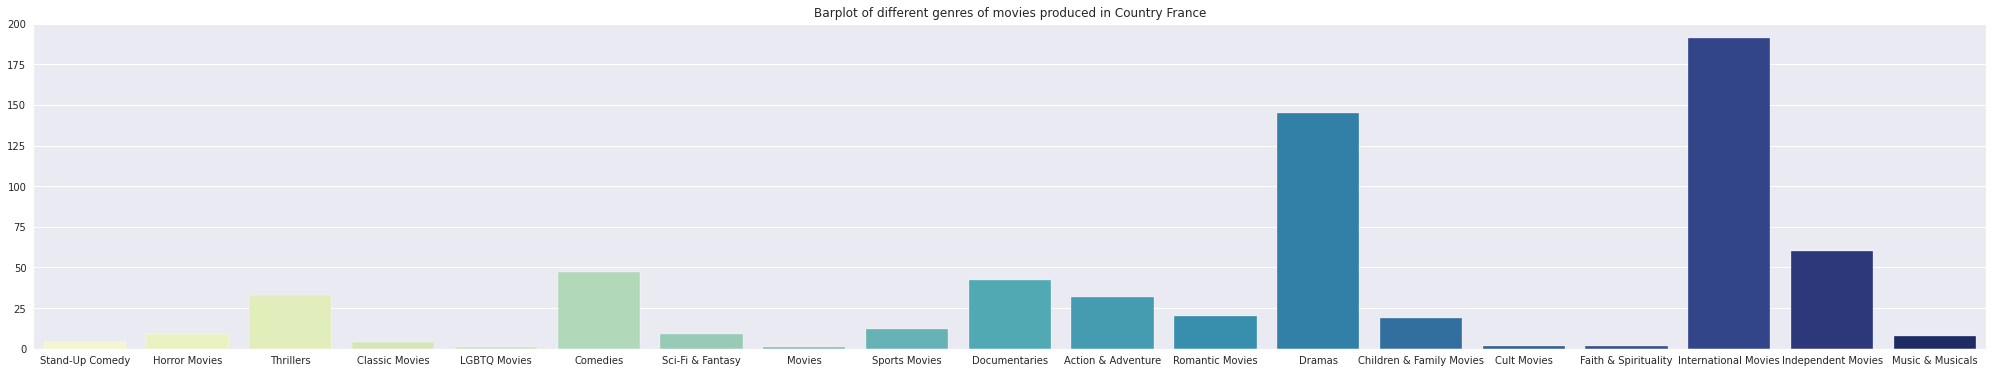

In [83]:
top5_country=top_country_movie.Country.tolist()
for j in top5_country:
  a=country_movie[country_movie[j]==1]
  new_dict={}
  values,keys,num=[],[],0
  for i in un_genre:
    if(np.sum(a[i])>0):
      new_dict[i]=np.sum(a[i])
      values.append(np.sum(a[i]))
      keys.append(i)
  plt.figure(figsize = (35,6))
  sns.barplot(x=keys,y=values,palette='YlGnBu')
  plt.title('Barplot of different genres of movies produced in Country '+j)
  plt.show()

1. Top 3 genre of movie contents United States produces are : Dramas > Comedies > Documentaries
2. Top 3 genre of movie contents Canada produces are :  Comedies > Dramas > Children & family movies
3. Top 3 genre of movie contents France produces are :  International movies > Dramas > Independent movies.
4. Top 3 genre of movie contents United Kingdom produces are : Dramas > Independent movies > Comedies

##### Country Visualization based on TV shows

In [84]:
country_TVShow=country_df[country_df.type=='TV Show']
new_dict={}
values,keys,num=[],[],0
for i in un_country:
  if(np.sum(country_movie[i])>0):
    new_dict[i]=np.sum(country_TVShow[i])
    values.append(np.sum(country_TVShow[i]))
    keys.append(i)
new_df=pd.DataFrame({'Country':new_dict.keys(),'Count':new_dict.values()})
new_df.head(10)

Country  Count
0  Cayman Islands      0
1       Indonesia      3
2         Namibia      0
3          Malawi      0
4         Bahamas      0
5         Vietnam      0
6   United States   1102
7          Sweden     10
8          Panama      0
9           Italy     22

In [85]:
new_df.describe()

Count
count   113.000000
mean     23.398230
std     108.505229
min       0.000000
25%       0.000000
50%       1.000000
75%       8.000000
max    1102.000000

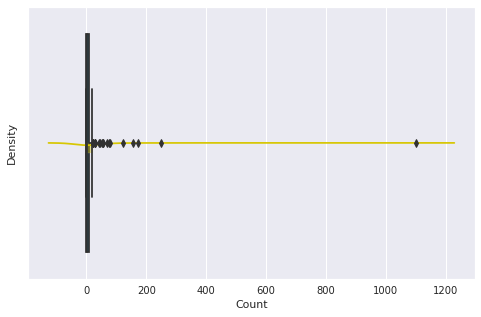

In [86]:
plt.figure(figsize=(8,5))
sns.distplot(new_df['Count'],color='y')
sns.boxplot(new_df['Count'])
plt.show()

In [87]:
top_country_TVshow=new_df[new_df.Count>100]
top_country_TVshow

Country  Count
6     United States   1102
15   United Kingdom    249
22           Canada    121
68      South Korea    157
102           Japan    171

Most of the TV shows are produced in United States followed by UK, Japan, South Korea and Canada

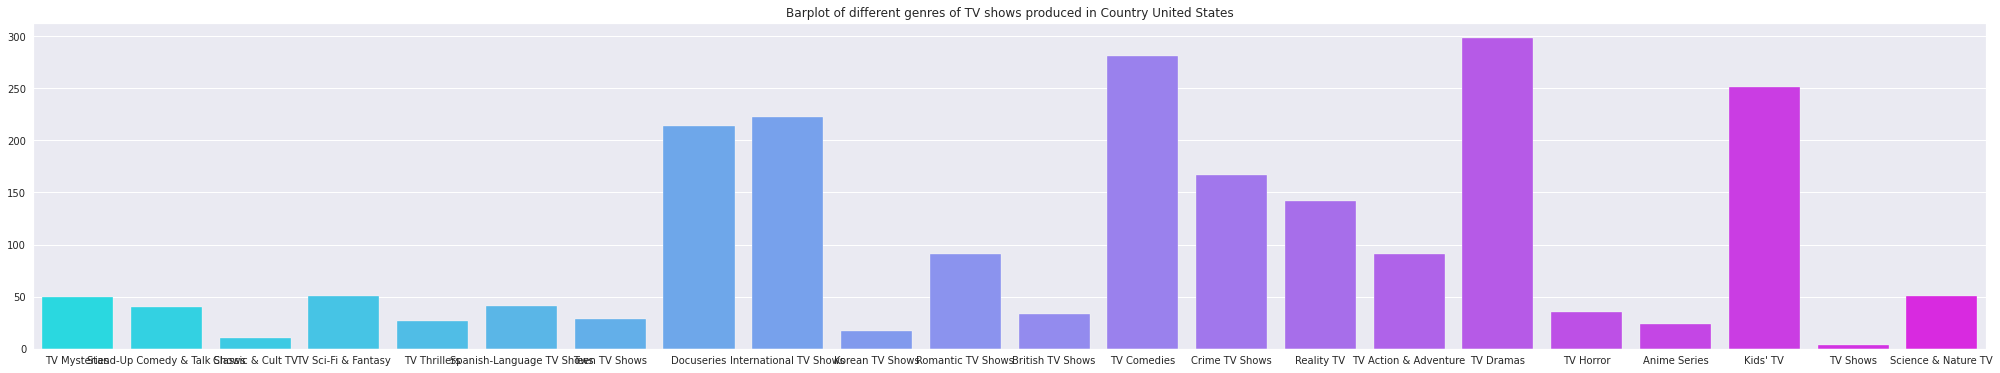

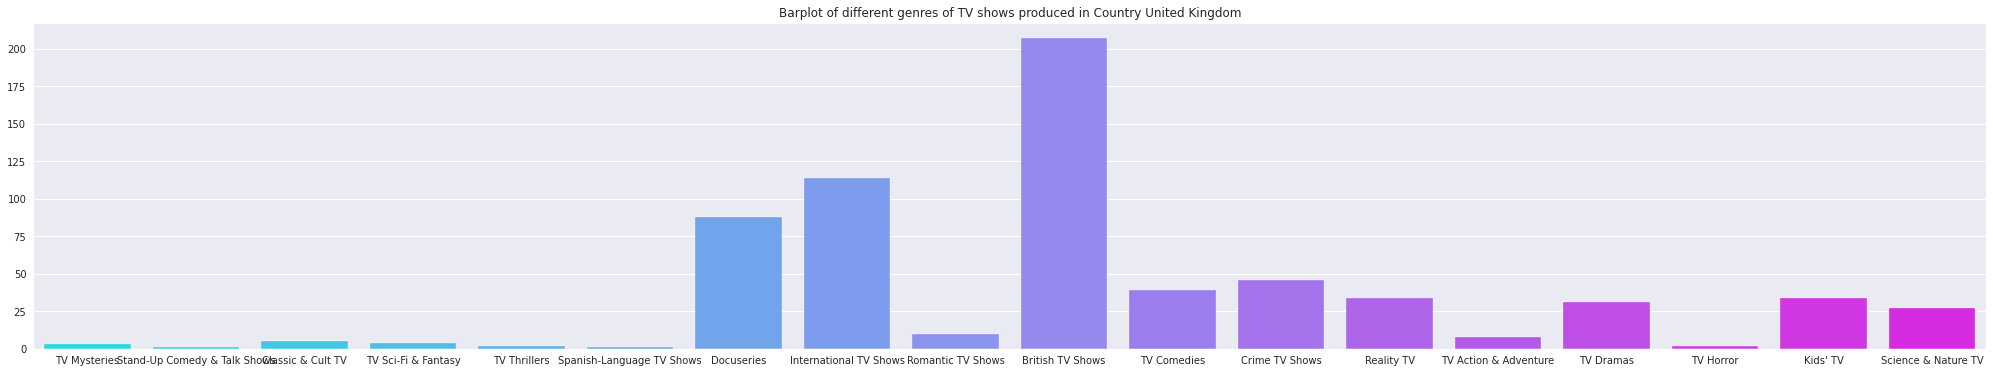

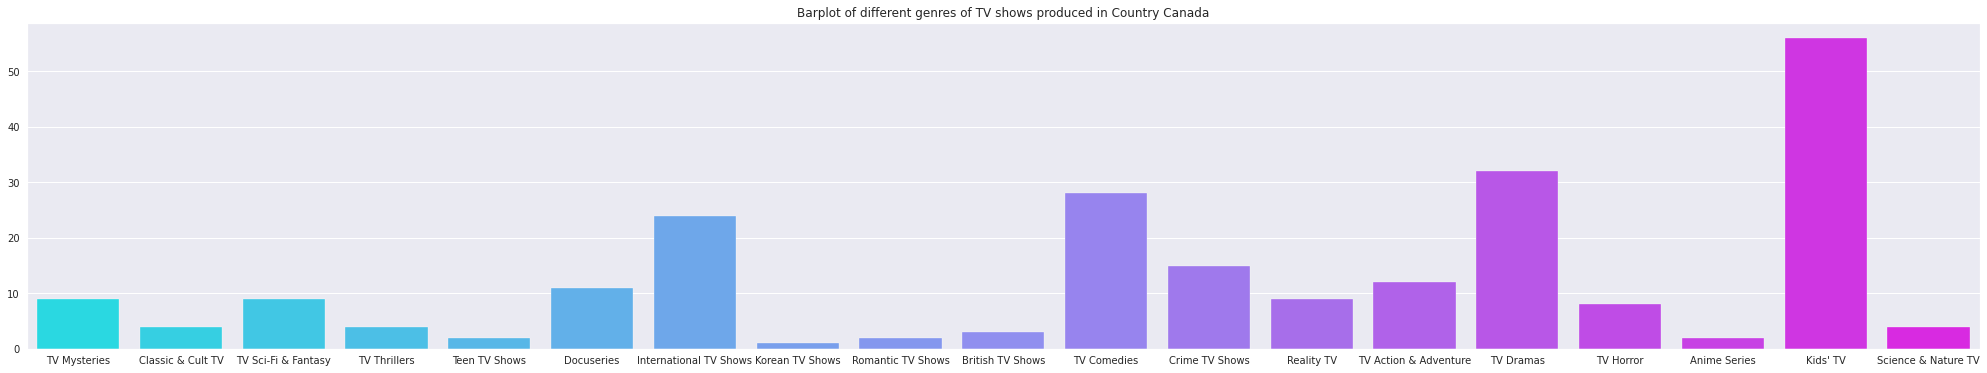

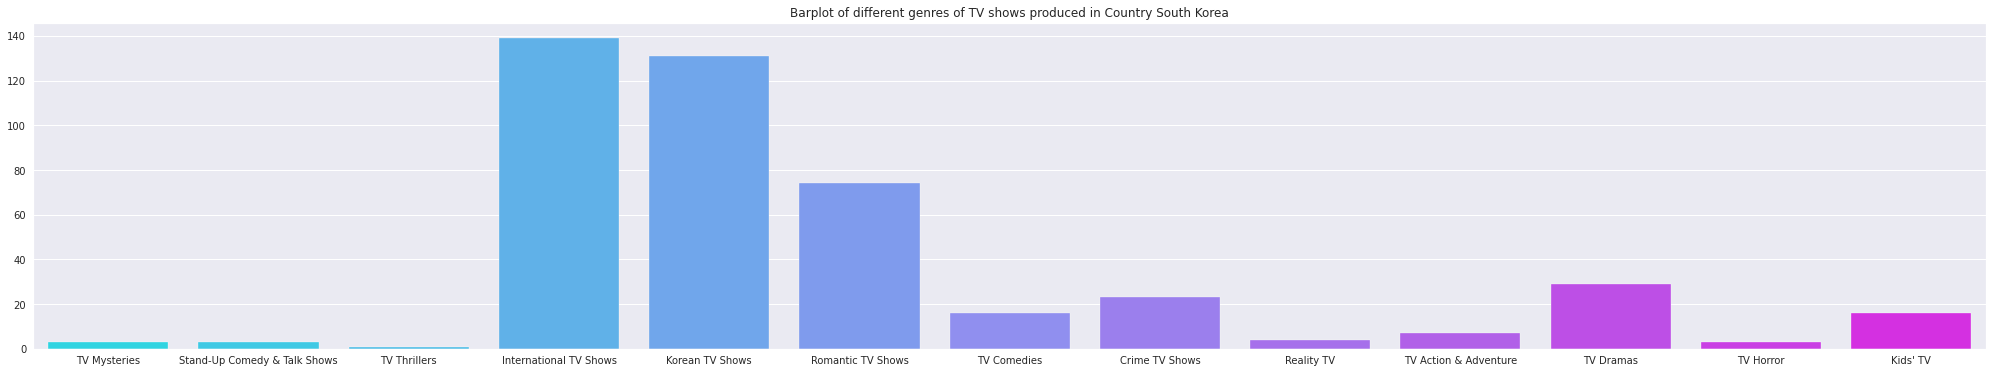

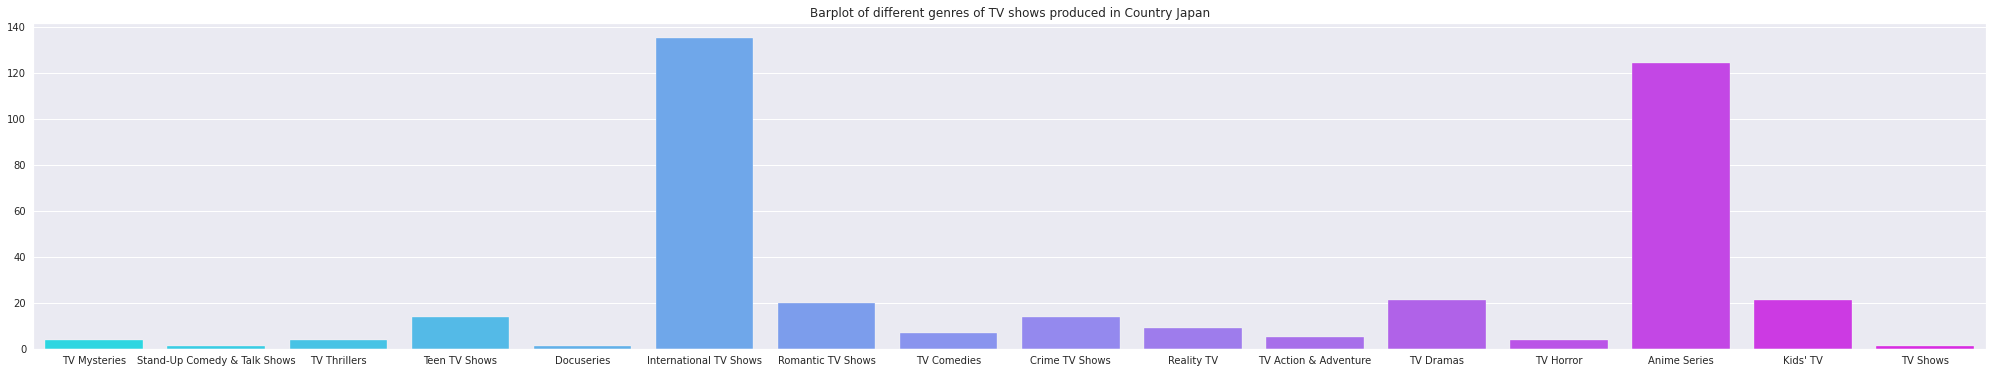

In [88]:
top5_country=top_country_TVshow.Country.tolist()
for j in top5_country:
  a=country_TVShow[country_TVShow[j]==1]
  new_dict={}
  values,keys,num=[],[],0
  for i in un_genre:
    if(np.sum(a[i])>0):
      new_dict[i]=np.sum(a[i])
      values.append(np.sum(a[i]))
      keys.append(i)
  plt.figure(figsize = (35,6))
  sns.barplot(x=keys,y=values,palette='cool')
  plt.title('Barplot of different genres of TV shows produced in Country '+j)
  plt.show()

Top 3 genre of TV shows contents following countries produced are : 
1. Japan : International TV shows > Anime Series > Kids TV=Drama TV
2. United Kingdom:  British TV shows > International TV shows > Docuseries
3. Canada produces :  Kids TV> TV Dramas > TV Comedies.
4. South Korea: International TV shows > Korean TV shows > Romantic TV shows
5. United States : Dramas > Independent movies > Comedies

### <b><u>Data for Modelling</u></b>

In [89]:
resultant_df=df[['listed_in','description','title']]

### Rating column can be imputed with integer values

In [90]:
genre_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [91]:
genre_df['rating']=genre_df['rating'].map({'TV-MA':1, 'R':2, 'PG-13':3, 'TV-14':4, 'TV-PG':5, 'NR':6, 'TV-G':7, 'TV-Y':8,
       'TV-Y7':9, 'PG':10, 'G':11, 'NC-17':12, 'TV-Y7-FV':13, 'UR':14})

## <u><b>Removing Punctuations</b></u>

Method to remove punctuations

In [92]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [93]:
resultant_df['title'] = resultant_df['title'].apply(remove_punctuation)

In [94]:
resultant_df['description'] = resultant_df['description'].apply(remove_punctuation)
resultant_df['listed_in']= resultant_df['listed_in'].apply(remove_punctuation)
resultant_df.head()

listed_in  \
0  International TV Shows TV Dramas TV SciFi  Fan...   
1                        Dramas International Movies   
2                 Horror Movies International Movies   
3  Action  Adventure Independent Movies SciFi  Fa...   
4                                             Dramas   

                                         description title  
0  In a future where the elite inhabit an island ...     3  
1  After a devastating earthquake hits Mexico Cit...   719  
2  When an army recruit is found dead his fellow ...  2359  
3  In a postapocalyptic world ragdoll robots hide...     9  
4  A brilliant group of students become cardcount...    21

## <b><u>Removing Stop words</u></b>

In [95]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [96]:
w = stopwords.words('english')
print('Stop Words :')
np.array(w)

Stop Words :


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [97]:
print("Number of stopwords: ", len(w))

Number of stopwords:  179


Method to remove stop words

In [98]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in w]
    # joining the list of words with space separator
    return " ".join(text)

In [99]:
resultant_df['title'] = resultant_df['title'].apply(stopwords)
resultant_df['description'] = resultant_df['description'].apply(stopwords)
resultant_df['listed_in'] = resultant_df['listed_in'].apply(stopwords)
resultant_df.head()

listed_in  \
0  international tv shows tv dramas tv scifi fantasy   
1                        dramas international movies   
2                 horror movies international movies   
3  action adventure independent movies scifi fantasy   
4                                             dramas   

                                         description title  
0  future elite inhabit island paradise far crowd...     3  
1  devastating earthquake hits mexico city trappe...   719  
2  army recruit found dead fellow soldiers forced...  2359  
3  postapocalyptic world ragdoll robots hide fear...     9  
4  brilliant group students become cardcounting e...    21

## <b><u>Stemmming</b></u>

### <b>Before Stemming</b>

#### Description

In [100]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(resultant_df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [101]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

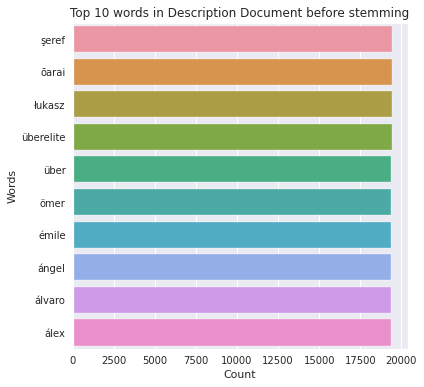

In [102]:
top_vacab = vocab_bef_stem.head(10)
top_vacab=pd.DataFrame(top_vacab.rename_axis('Words').reset_index(name='Count'))
top_vacab
plt.figure(figsize=(6,6))
sns.barplot(y=top_vacab.Words,x=top_vacab.Count)
plt.title('Top 10 words in Description Document before stemming')
plt.show()

#### Title

In [103]:
count_vectorizer_title = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(resultant_df['title'])
# collect the vocabulary items used in the vectorizer
dictionary_title = count_vectorizer.vocabulary_.items()

In [104]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_title:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

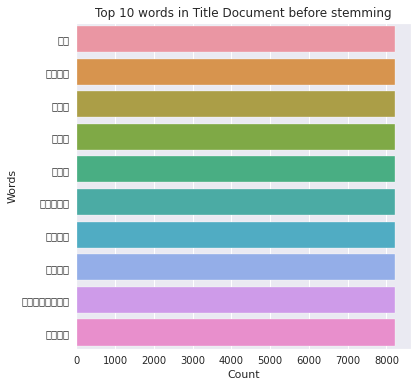

Words  Count
0        탄생   8221
1      최강전사   8220
2       잡는다   8219
3       영웅의   8218
4       반드시   8217
5     미니특공대   8216
6      마녀사냥   8215
7      海的儿子   8214
8  忍者ハットリくん   8213
9      แผนร   8212

In [105]:
top_vacab = vocab_bef_stem.head(10)
top_vacab=pd.DataFrame(top_vacab.rename_axis('Words').reset_index(name='Count'))
plt.figure(figsize=(6,6))
sns.barplot(y=top_vacab.Words,x=top_vacab.Count)
plt.title('Top 10 words in Title Document before stemming')
plt.show()
pd.DataFrame(top_vacab)

#### Genre (listed_in)

In [106]:
count_vectorizer_genre = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(resultant_df['listed_in'])
# collect the vocabulary items used in the vectorizer
dictionary_genre = count_vectorizer.vocabulary_.items()

In [107]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_genre:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

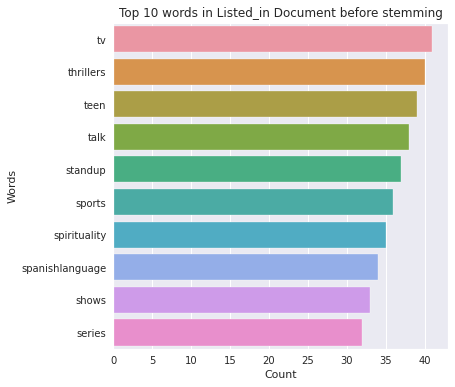

Words  Count
0               tv     41
1        thrillers     40
2             teen     39
3             talk     38
4          standup     37
5           sports     36
6     spirituality     35
7  spanishlanguage     34
8            shows     33
9           series     32

In [108]:
top_vacab = vocab_bef_stem.head(10)
top_vacab=pd.DataFrame(top_vacab.rename_axis('Words').reset_index(name='Count'))
plt.figure(figsize=(6,6))
sns.barplot(y=top_vacab.Words,x=top_vacab.Count)
plt.title('Top 10 words in Listed_in Document before stemming')
plt.show()
pd.DataFrame(top_vacab)

### Function to carry out Stemming

In [109]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [110]:
resultant_df['title'] = resultant_df['title'].apply(stemming)

In [111]:
resultant_df['description'] = resultant_df['description'].apply(stemming)
resultant_df['listed_in'] = resultant_df['listed_in'].apply(stemming)
resultant_df.head()

listed_in  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description title  
0  futur elit inhabit island paradis far crowd sl...     3  
1  devast earthquak hit mexico citi trap survivor...   719  
2  armi recruit found dead fellow soldier forc co...  2359  
3  postapocalypt world ragdol robot hide fear dan...     9  
4  brilliant group student becom cardcount expert...    21

### After Stemming

#### Description

In [112]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(resultant_df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [113]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(resultant_df['description'])
# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()

In [114]:
print(f'The shape of array after stemming is {pd.DataFrame(array).shape}')
pd.DataFrame(array).head()

The shape of array after stemming is (7677, 14099)


0      1      2      3      4      5      6      7      8      9      \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   10     11     12     13     14     15     16     17     18     19     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   20     21     22     23     24     25     26     27     28     29     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   30     31     32     33     34     35     36     37     38     39     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40     41     42     43     44     45     46     47     48     49     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   50     51     52     53     54     55     56     57     58     59     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   60     61     62     63     64     65     66     67     68     69     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   70     71     72     73     74     75     76     77     78     79     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   80     81     82     83     84     85     86     87     88     89     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0

In [115]:
len(dictionary)

14099

      Words  Count
0     şeref  14098
1     ōarai  14097
2    łukasz  14096
3  überelit  14095
4      über  14094
5      ömer  14093
6     émile  14092
7     ángel  14091
8    álvaro  14090
9      álex  14089


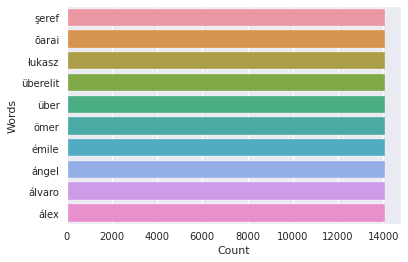

In [116]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = pd.DataFrame(vocab_after_stem.head(10).rename_axis('Words').reset_index(name='Count'))
print(top_vacab)
sns.barplot(y=top_vacab.Words,x=top_vacab.Count)
plt.show()

#### Title

In [117]:
# Create the object of tfid vectorizer
tfid_vectorizer_title = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer_title.fit(resultant_df['title'])

# Collect the vocabulary items used in the vectorizer
dictionary_title = tfid_vectorizer_title.vocabulary_.items()

In [118]:
# extract the tfid representation matrix of the text data
tfid_matrix_title = tfid_vectorizer_title.transform(resultant_df['description'])
# collect the tfid matrix in numpy array
array_title = tfid_matrix_title.toarray()
print(f'The shape of array after stemming is {pd.DataFrame(array_title).shape}')
pd.DataFrame(array_title).head()

The shape of array after stemming is (7677, 7358)


0     1     2     3     4     5     6     7     8     9     10    11    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 

In [119]:
len(dictionary_title)

7358

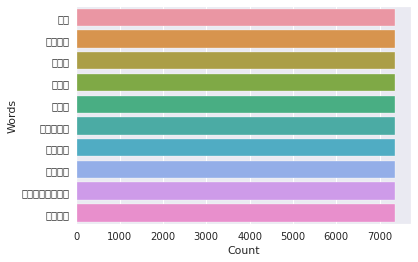

Words  Count
0        탄생   7357
1      최강전사   7356
2       잡는다   7355
3       영웅의   7354
4       반드시   7353
5     미니특공대   7352
6      마녀사냥   7351
7      海的儿子   7350
8  忍者ハットリくん   7349
9      แผนร   7348

In [120]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_title:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = pd.DataFrame(vocab_after_stem.head(10).rename_axis('Words').reset_index(name='Count'))
sns.barplot(y=top_vacab.Words,x=top_vacab.Count)
plt.show()
top_vacab

#### Genre (listed_in)

In [121]:
# Create the object of tfid vectorizer
tfid_vectorizer_genre = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer_genre.fit(resultant_df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary_genre = tfid_vectorizer_genre.vocabulary_.items()

In [122]:
# extract the tfid representation matrix of the text data
tfid_matrix_genre = tfid_vectorizer_genre.transform(resultant_df['description'])
# collect the tfid matrix in numpy array
array_genre = tfid_matrix_genre.toarray()
print(f'The shape of array after stemming is {pd.DataFrame(array_genre).shape}')
pd.DataFrame(array_genre).head()

The shape of array after stemming is (7677, 40)


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

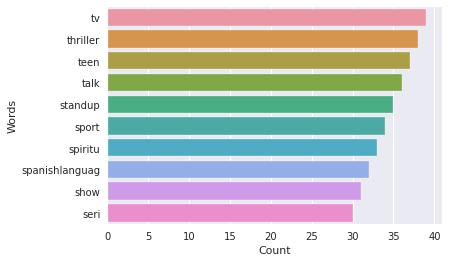

Words  Count
0              tv     39
1        thriller     38
2            teen     37
3            talk     36
4         standup     35
5           sport     34
6         spiritu     33
7  spanishlanguag     32
8            show     31
9            seri     30

In [123]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_genre:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = pd.DataFrame(vocab_after_stem.head(10).rename_axis('Words').reset_index(name='Count'))
sns.barplot(y=top_vacab.Words,x=top_vacab.Count)
plt.show()
top_vacab

Adding a column with title length and description

In [124]:
resultant_df['title_length']=resultant_df['title'].apply(lambda x: len(x))
resultant_df['description_length']=resultant_df['description'].apply(lambda x: len(x))
resultant_df['genre_length']=resultant_df['listed_in'].apply(lambda x: len(x))

In [125]:
resultant_df.head()

listed_in  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description title  title_length  \
0  futur elit inhabit island paradis far crowd sl...     3             1   
1  devast earthquak hit mexico citi trap survivor...   719             3   
2  armi recruit found dead fellow soldier forc co...  2359             4   
3  postapocalypt world ragdol robot hide fear dan...     9             1   
4  brilliant group student becom cardcount expert...    21             2   

   description_length  genre_length  
0                  82            40  
1                  88            17  
2                 102            23  
3                  89            43  
4                  99             5

## <b><u>K Mean Clustering</u></b>

In [126]:
pd.DataFrame(array).index

RangeIndex(start=0, stop=7677, step=1)

In [127]:
resultant_df.reset_index(inplace=True)
resultant_df.index

RangeIndex(start=0, stop=7677, step=1)

In [128]:
x=pd.concat([resultant_df['genre_length'],pd.DataFrame(array_genre)],axis=1)
print(x.shape)
x.tail()

(7677, 41)


genre_length    0    1    2    3    4    5    6    7    8    9   10  \
7672            17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7673            29  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7674            35  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
7675            25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7676            23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

       11   12       13   14   15   16   17   18   19   20   21   22  \
7672  0.0  0.0  1.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7673  0.0  0.0  0.66011  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7674  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7675  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7676  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            23   24   25   26   27   28   29   30   31   32   33   34   35  \
7672  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7673  0.751169  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7674  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7675  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7676  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       36   37   38   39  
7672  0.0  0.0  0.0  0.0  
7673  0.0  0.0  0.0  0.0  
7674  0.0  0.0  0.0  0.0  
7675  0.0  0.0  0.0  0.0  
7676  0.0  0.0  0.0  0.0

In [129]:
std_scaler= preprocessing.StandardScaler()
x_scaled=std_scaler.fit_transform(x)
x_scaled

array([[ 1.46643362, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158],
       [-0.68940914, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158],
       [-0.12701538, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158],
       ...,
       [ 0.99777215, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158],
       [ 0.06044921, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158],
       [-0.12701538, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158]])

In [130]:
n_clusters=[10,20,30,39,40,45,50,60]
cluster=[]
for i in n_clusters:
  clusterer = KMeans(n_clusters=i, random_state=100)
  cluster_labels = clusterer.fit_predict(x_scaled)
  center=clusterer.cluster_centers_
  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed (7)
  # clusters
  silhouette_avg = silhouette_score(array_genre, cluster_labels)
  print("For n_clusters =", i,
        "The average silhouette_score is :", silhouette_avg)
  cluster.append(silhouette_avg)

For n_clusters = 10 The average silhouette_score is : 0.5678187642174743
For n_clusters = 20 The average silhouette_score is : 0.6848817019572487
For n_clusters = 30 The average silhouette_score is : 0.7282216162387053
For n_clusters = 39 The average silhouette_score is : 0.8683173785549626
For n_clusters = 40 The average silhouette_score is : 0.8734206537555605
For n_clusters = 45 The average silhouette_score is : 0.27743889139151506
For n_clusters = 50 The average silhouette_score is : 0.28319178489951613
For n_clusters = 60 The average silhouette_score is : 0.22357633978385458


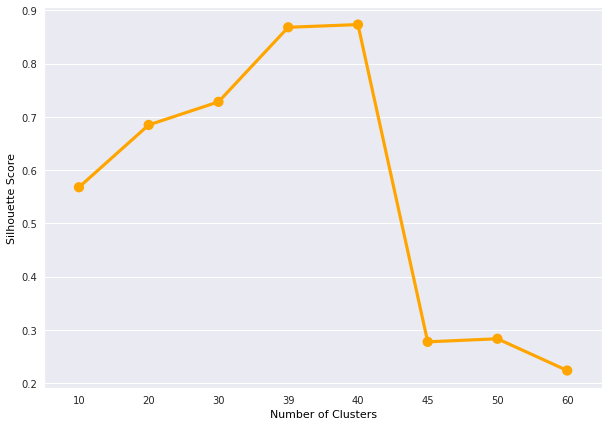

In [131]:
plt.figure(figsize=(10,7))
sns.pointplot(x=n_clusters,y=cluster,color='orange')
plt.xlabel('Number of Clusters',color='black')
plt.ylabel('Silhouette Score',color='black')
plt.show()

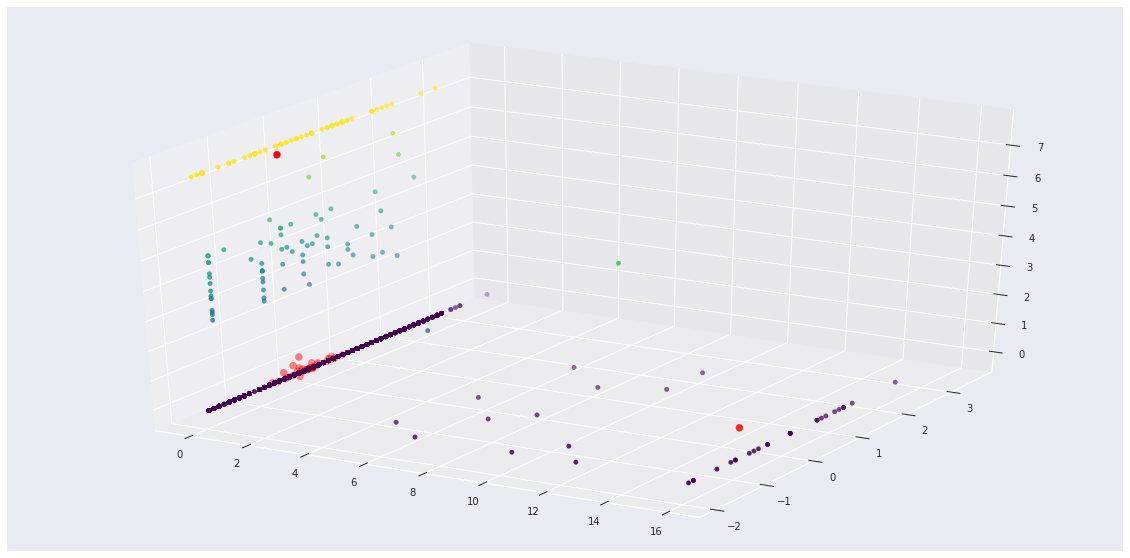

In [133]:
plt.figure(figsize=(20,10))
# plt.scatter(x_scaled[:, 1],x_scaled[:, 0], c=cluster_labels,
#           s=50, cmap='viridis')
ax = plt.axes(projection='3d')
ax.scatter3D(x_scaled[:, 1], x_scaled[:, 0], x_scaled[:, 2], c=x_scaled[:, 2], cmap='viridis')
clusterer = KMeans(n_clusters=40, random_state=10)
cluster_labels = clusterer.fit_predict(x_scaled)
center=clusterer.cluster_centers_
ax.scatter3D(center[:, 1], center[:, 0], center[:, 2], color='red',s=50)                       
plt.show()

In [182]:
clusterer.cluster_centers_

array([[ 0.04306173, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158],
       [ 0.09673268, -0.06970641, -0.14910529, ..., -0.03407791,
        -0.06457148, -0.09080158],
       [ 0.46662248, -0.06970641, -0.14910529, ..., -0.17534105,
         5.54062353,  1.04257851],
       ...,
       [-0.26938235,  0.04659737,  0.46194379, ..., -0.17534105,
        -0.06457148, -0.09080158],
       [-0.33971558, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, -0.09080158],
       [ 0.44916255, -0.06970641, -0.14910529, ..., -0.17534105,
        -0.06457148, 13.34327823]])

In [185]:
clusterer.cluster_centers_.shape

(40, 41)

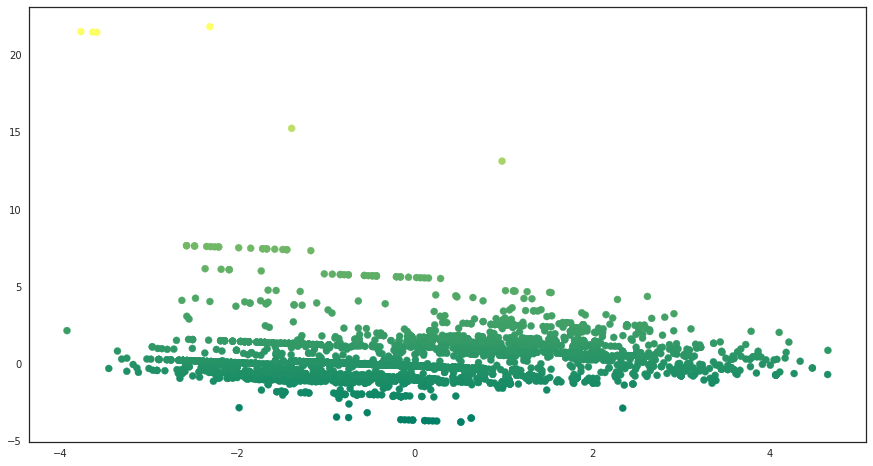

In [195]:
pca = PCA(n_components=2,random_state=10)
pca_result = pca.fit_transform(x_scaled)
pca_center=pca.fit_transform(clusterer.cluster_centers_)
df_x,df_center=pd.DataFrame(),pd.DataFrame()
df_x['pca-one'] = pca_result[:,0]
df_x['pca-two'] = pca_result[:,1]
df_center['pca-one']=pca_center[:,0]
df_center['pca-two']=pca_center[:,1]
plt.figure(figsize=(15,8))
plt.scatter(df_x['pca-one'], df_x['pca-two'], c=df_x['pca-two'],
            s=50, cmap='summer')
# plt.scatter(df_center['pca-one'], df_center['pca-two'], c='red',
#             s=60, cmap='red')
plt.show()

### Elbow Method

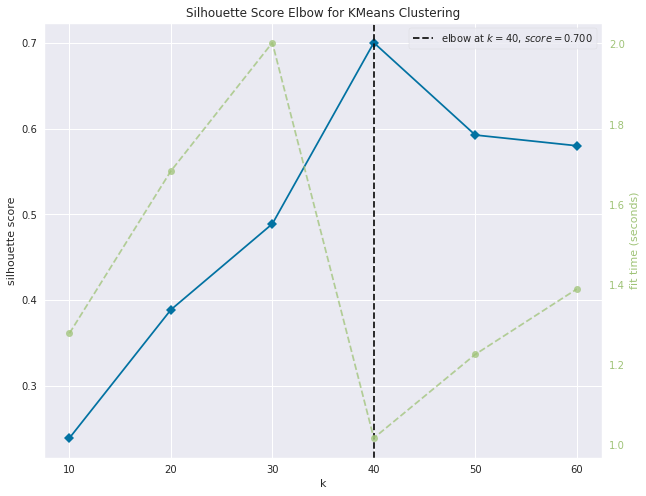

In [134]:
plt.figure(figsize=(10,8))
model = KMeans(random_state=100)
visualizer = KElbowVisualizer(model, k=[10,20,30,40,50,60], metric='silhouette', locate_elbow=True)
visualizer.fit(x_scaled)
visualizer.show()
plt.show()

## <b><u>Heirarichal Clustering</u></b>

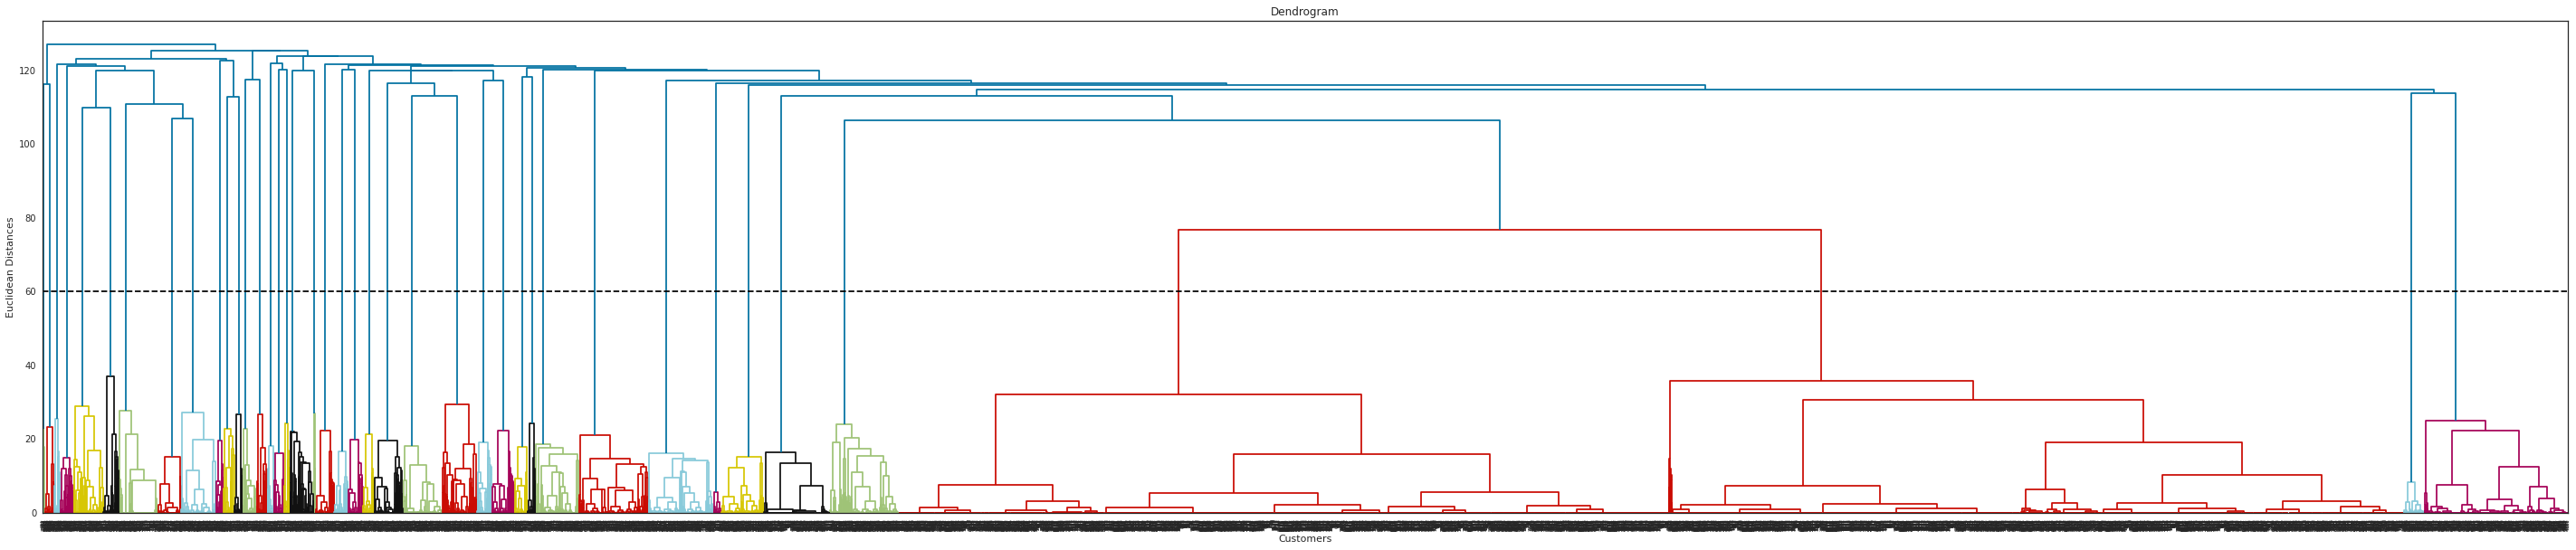

In [135]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(50,10))
sns.set_style(style='white')
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=60, color='black', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

On Manually counting the number of lines cut by the horizontal line, Optimal Number of Clusters are coming out to be 40

## <b><u>Spectral Clustering</u></b>

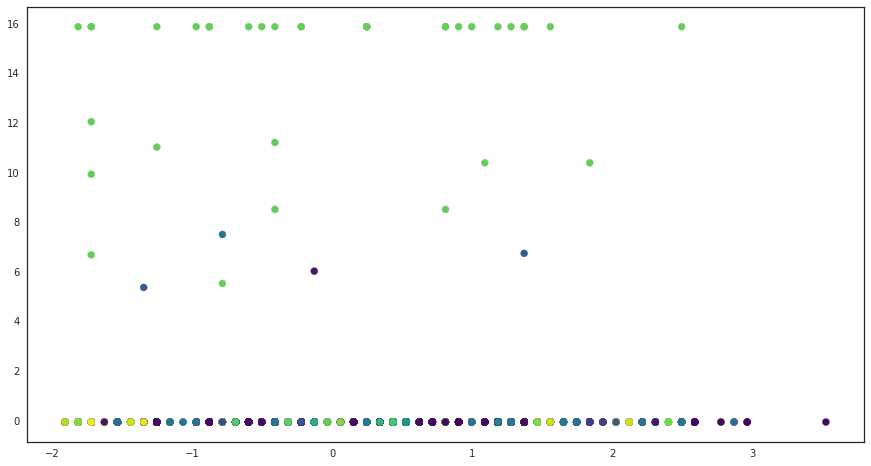

In [179]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=40, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(x_scaled)
plt.figure(figsize=(15,8))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

In [177]:
df=pd.DataFrame(labels)
df.head()

0
0   0
1   0
2  15
3   5
4   0

In [178]:
np.sort(df[0].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [160]:
df.index

RangeIndex(start=0, stop=7677, step=1)

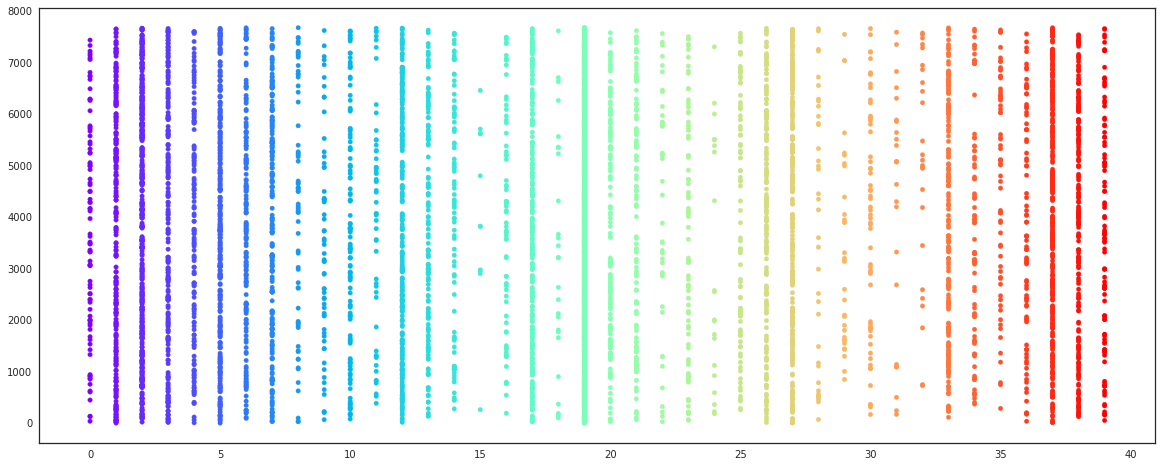

In [169]:
plt.figure(figsize=(20,8))
plt.scatter(df[0],df.index, c=df[0],
            s=20, cmap='rainbow')
plt.show()

In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_scaled)
X_pca = pca.transform(x_scaled)
print("original shape:   ", x_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (7677, 41)
transformed shape: (7677, 2)


In [144]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 

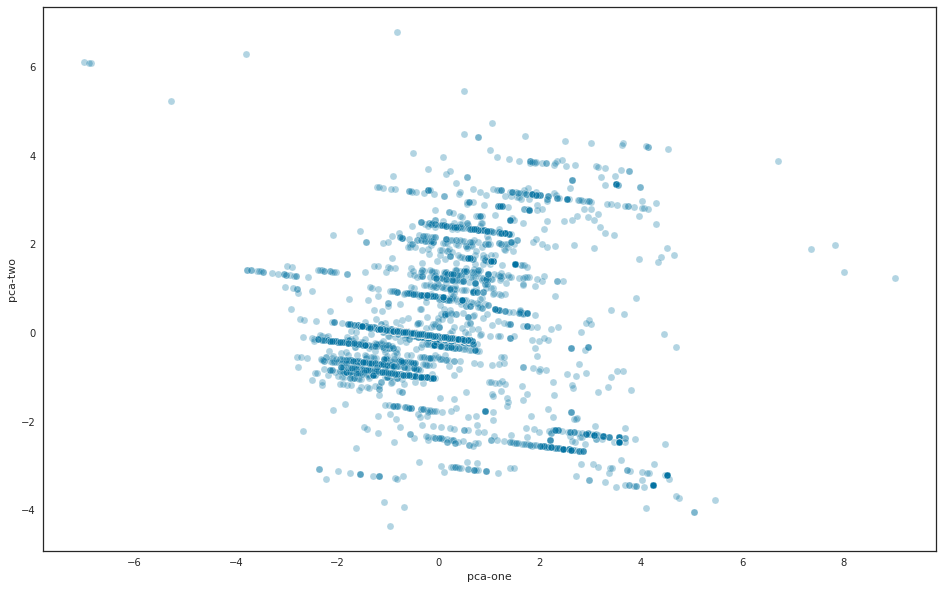

In [147]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette='coolwarm',
    data=df,
    legend="full",
    alpha=0.3
)